# DSC540 Project ML
### Gerardo Palacios

In [1]:
import pandas as pd
import numpy as np
data = pd.read_csv('heart.csv')  # Read dataset


# Data Description
For my final project I will be working with a heart failure dataset. It was retrieved from Kaggle.com
https://www.kaggle.com/fedesoriano/heart-failure-prediction.  It is a small dataset containing 918 observations, 11
unique associated features and a target class.

In [2]:
print('This dataset has {} observations and {} features'.format(*data.shape)) # Describe shape

This dataset has 918 observations and 12 features


It is a very clean dataset with no missing values.

In [3]:
data.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [4]:
data['FastingBS'] = data['FastingBS'].astype('object') # Convert variable to correct type
data['HeartDisease'] = data['HeartDisease'].astype('object') # Convert variable to correct type

The features included are shown below. It is a slightly unbalanced dataset with the target class having a 55%/44% split
between having and not having heart disease. The dataset includes mainly male patients with varying vital measurements
and accompanying cardiac symptoms.

Feature | Description | Mean/Most Frequent | Standard Deviation\Ratio
-----|-----|-----|-----|
Heart Disease | Target class, 1: Heart Disease 0: Normal | Heart Disease | Heart Disease: 55%, Normal: 44%
Age | Age of the patient | 53.5 | 9.43
RestingBP | Resting blood pressure [mm Hg]| 132.39 | 18.51
Cholesterol | Serum cholesterol| 198.79 | 109.38
Fasting BS | Fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise] | Normal  |0: 76%, 1: 23%
Max HR | Maximum heart rate achieved | 136.80 | 25.46
OldPeak | Numeric value measured in depression | 0.88 | 1.06
Sex | Sex of the patient | Male | M:78%, F:21%
ChestPain Type | Chest pain type  [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic] | Asymptomatic | TA:5%, ATA: 18%, NAP:22%, ASY: 54%
RestingECG | Resting ECF Results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria] | Normal | Normal: 60%, ST: 19%, LVH: 20%
Excercise Angina | If patient has exercised-induced angina [Y: Yes, N: No] | No | Yes: 40%, No: 59%
ST_Slope | The slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping] | Flat | Up: 43%, Down: 06%, Flat: 50%


The distributions of the features are shown below. Age is the only variable that appears to be nearly normal, while the
remaining 4 numerical variables appear to be skewed. All the categorical variables are unbalanced.

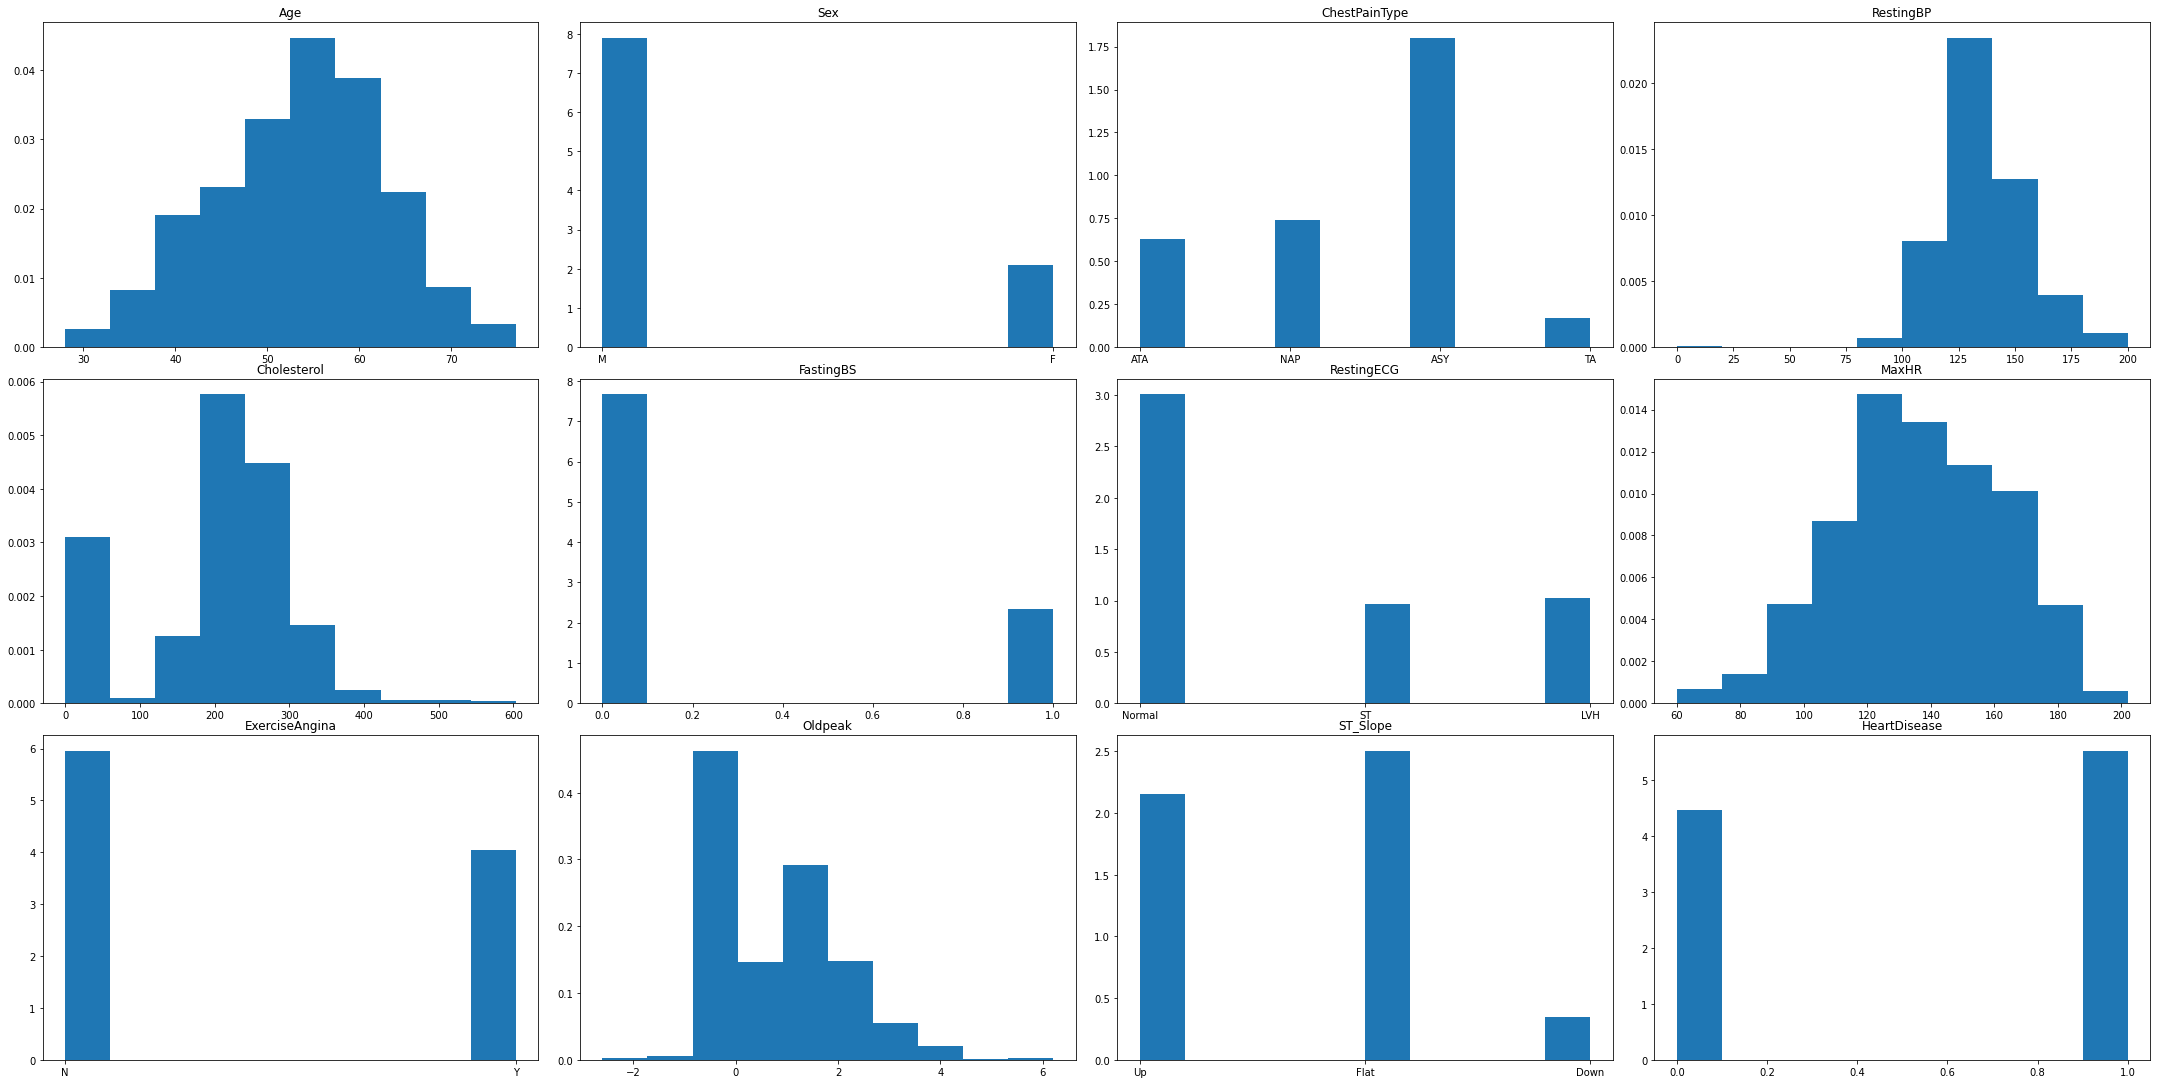

In [5]:
import matplotlib.pyplot as plt

rows, columns = 3,4
# Show the distribution for all attributes
fig, axs = plt.subplots(rows,columns, figsize=(30,15))   # initialize 4 by 6 plot grid
fig.tight_layout()                                      # set layout
column_names = [column for column in data]              # Get column names into list
i = 0
for x in range(rows):                                   # Fill plot grid
    for y in range(columns):
        if i < data.shape[1]:
            axs[x,y].hist(data[column_names[i]], density=True)
            axs[x,y].set(title=column_names[i])
            i += 1

The following are cross-tabulations between the categorical variables and heart disease. Most of the cross-tabulations
do not appear significant. Some of the most alarming are the cross-tabulations between heart disease and chest pain
type. There is an alarming majority of patients that were asymptomatic but had heart disease. In addition, there appears
to be some relationship between heart disease and having or not having exercise angina as well as having a flat ST Slope.
However, that also may be due to the unbalance nature of both of those features.

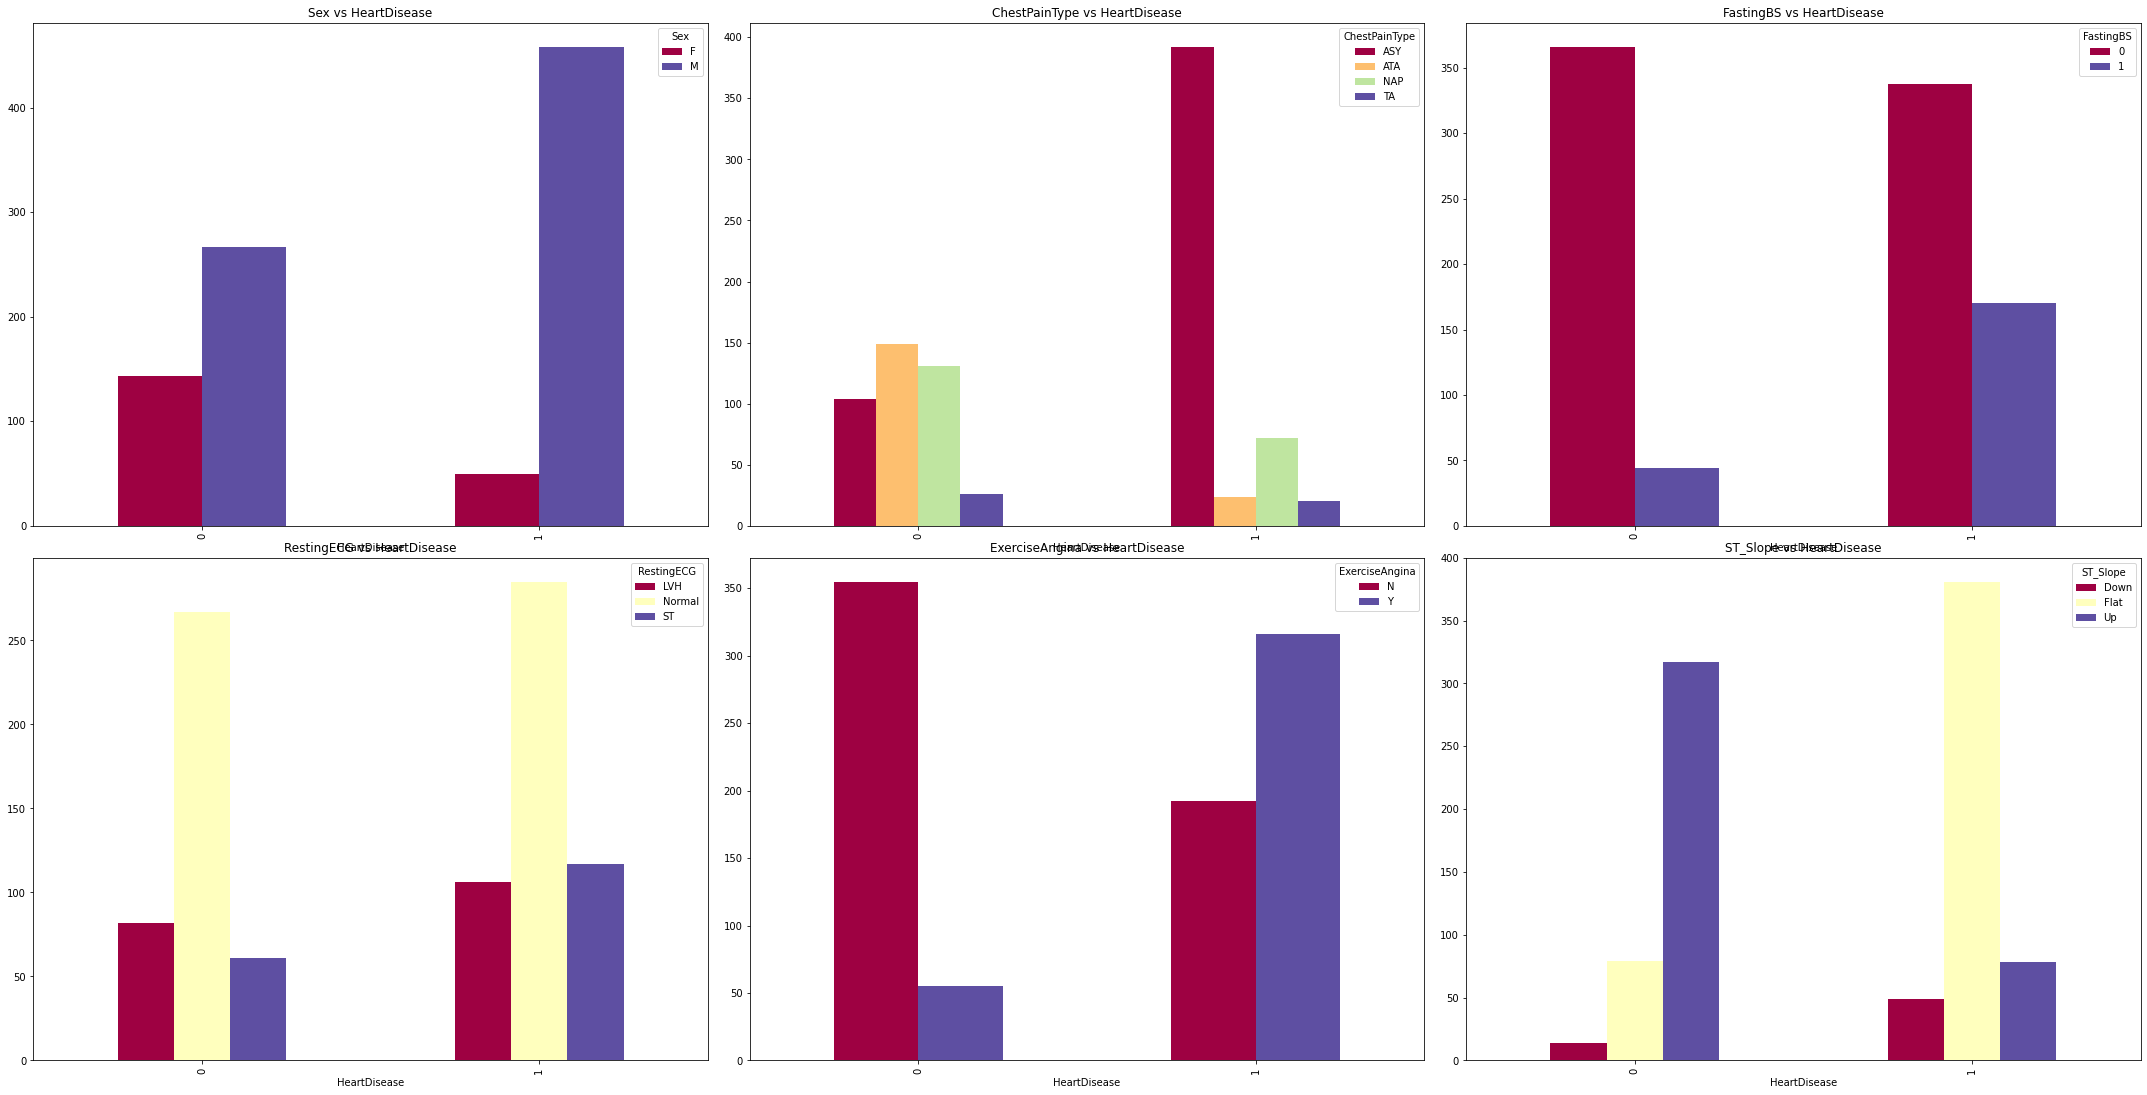

In [6]:
from scipy.stats import chi2_contingency

# Show the cross-tabulations for all categorical attributes with the target class
rows, columns = 2, 3
fig, axs = plt.subplots(rows,columns, figsize=(30,15))   # initialize plot grid
fig.tight_layout()                                      # set layout
i = 0
chi_squared_correlation = []
for x in range(rows):                                      # Fill plot grid
    for y in range(columns):
        if i < data.select_dtypes('object').shape[1] and data.select_dtypes('object').columns[i] != 'HeartDisease':
            cross_tabulation = pd.crosstab(data['HeartDisease'],data.select_dtypes('object').iloc[:,i])
            cross_tabulation.plot.bar(ax=axs[x,y],colormap='Spectral',
                                      title='{} vs HeartDisease'.format(data.select_dtypes('object').columns[i]))
            chi2, p, dof, expected = chi2_contingency(cross_tabulation)
            chi_squared_correlation.append(('{} vs HeartDisease'.format(data.select_dtypes('object').columns[i]),p))

            i +=1

However, despite the seemingly unremarkable cross-tabulations, the chi-squared test between the categorical variables
and the target class all reject the null hypothesis that the variables are uncorrelated and can accept that the features
are in correlated.  As shown below, the p-values have 99% confidence that the features are correlated.


In [7]:
print(pd.DataFrame(chi_squared_correlation,columns=['Feature Pairs','P-value']))

                    Feature Pairs       P-value
0             Sex vs HeartDisease  4.597617e-20
1   ChestPainType vs HeartDisease  8.083728e-58
2       FastingBS vs HeartDisease  1.057302e-15
3      RestingECG vs HeartDisease  4.229233e-03
4  ExerciseAngina vs HeartDisease  2.907808e-50
5        ST_Slope vs HeartDisease  5.167638e-78


I can compute the point bi-serial correlation to measure the relationship between the continuous variables and the
target class. As shown below, all the continuous features appear to have a moderately strong determinant relationship
with having heart disease. All of the factors appear significant with heart disease.

In [8]:
from scipy.stats import pointbiserialr
biserialcorr = []
i = 0
while i < data.select_dtypes('number').shape[1]:
            biserialcorr.append(('{} vs HeartDisease'.format(data.select_dtypes('number').columns[i]),
                                 *pointbiserialr(data['HeartDisease'], data.select_dtypes('number').iloc[:,i])))
            i +=1

In [9]:
print(pd.DataFrame(biserialcorr,columns=['Feature Pairs','Bi-Serial Correlations','P-Value']))

                 Feature Pairs  Bi-Serial Correlations       P-Value
0          Age vs HeartDisease                0.282039  3.007953e-18
1    RestingBP vs HeartDisease                0.107589  1.095315e-03
2  Cholesterol vs HeartDisease               -0.232741  9.308309e-13
3        MaxHR vs HeartDisease               -0.400421  1.137786e-36
4      Oldpeak vs HeartDisease                0.403951  2.390772e-37


# Pre-Processing

In order to prepare the data for classification I'll need to perform a few tasks. First I'll need to encode the
categorical variables, and then I have to standardize the dataset. Encoding the categorical variables can be done in two
different ways. It can be done using one-hot encoding which converts each categorical variable as its own feature and
encodes it with a binary value of 1 or 0. This is done for each categorical variable resulting in a higher-dimensional
dataset. The second way is by way of Weight of evidence. Weight of evidence tells the predictive power of an independent
categorical variable in relation to the dependent categorical variable. It transforms a categorical feature into a
continuous feature in relation to the dependent variable. In this project, I will experiment with both methodologies and
create and compare models in between both sets.

In [10]:
from category_encoders.woe import WOEEncoder
data['FastingBS'] = data['FastingBS'].astype('int') # Convert variable to correct type
data['HeartDisease'] = data['HeartDisease'].astype('int') # Convert variable to correct type

y = data.pop('HeartDisease')

# Method 1: One-Hot Encoding
data1 = pd.get_dummies(data)
data2 = data.copy()

# Method 2: Weight of Evidence
columns = [col for col in data2.select_dtypes('object') ]
woe_encoder = WOEEncoder(cols=columns)

data2[columns] = woe_encoder.fit_transform(data2[columns] ,y)

In [11]:
data1.head()

Age  RestingBP  Cholesterol  FastingBS  MaxHR  Oldpeak  Sex_F  Sex_M  \
0   40        140          289          0    172      0.0      0      1   
1   49        160          180          0    156      1.0      1      0   
2   37        130          283          0     98      0.0      0      1   
3   48        138          214          0    108      1.5      1      0   
4   54        150          195          0    122      0.0      0      1   

   ChestPainType_ASY  ChestPainType_ATA  ChestPainType_NAP  ChestPainType_TA  \
0                  0                  1                  0                 0   
1                  0                  0                  1                 0   
2                  0                  1                  0                 0   
3                  1                  0                  0                 0   
4                  0                  0                  1                 0   

   RestingECG_LVH  RestingECG_Normal  RestingECG_ST  ExerciseAngina_N  \
0               0                  1              0                 1   
1               0                  1              0                 1   
2               0                  0              1                 1   
3               0                  1              0                 0   
4               0                  1              0                 1   

   ExerciseAngina_Y  ST_Slope_Down  ST_Slope_Flat  ST_Slope_Up  
0                 0              0              0            1  
1                 0              0              1            0  
2                 0              0              0            1  
3                 1              0              1            0  
4                 0              0              0            1

In [12]:
data2.head()

Age       Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  \
0   40  0.324676      -2.005147        140          289          0   
1   49 -1.251375      -0.805730        160          180          0   
2   37  0.324676      -2.005147        130          283          0   
3   48 -1.251375       1.106462        138          214          0   
4   54  0.324676      -0.805730        150          195          0   

   RestingECG  MaxHR  ExerciseAngina  Oldpeak  ST_Slope  
0   -0.148383    172       -0.825628      0.0 -1.605991  
1   -0.148383    156       -0.825628      1.0  1.350007  
2    0.430163     98       -0.825628      0.0 -1.605991  
3   -0.148383    108        1.520163      1.5  1.350007  
4   -0.148383    122       -0.825628      0.0 -1.605991

Next I will split the data into training and test and transform the data by applying MinMax Transformation. This is done
on both sets of data.

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
# Split data into training and testing
X1_train, X1_test, y1_train, y1_test = train_test_split(data1, y, test_size=0.20, random_state=32)
X2_train, X2_test, y2_train, y2_test = train_test_split(data2, y, test_size=0.20, random_state=32)

In [15]:
from sklearn.preprocessing import MinMaxScaler
# Standardize the dataset
ss = MinMaxScaler()
ss.fit(X1_train)
X1_train = ss.transform(X1_train)
X1_test = ss.transform(X1_test)

ss = MinMaxScaler()
ss.fit(X2_train)
X2_train = ss.transform(X2_train)
X2_test = ss.transform(X2_test)

# Modeling

Finally, I can begin modeling. In order to compare across models I will be using accuracy and AUC as the comparable
performance metric. In order to be thorough, in addition to experimenting with training and tests set, I will be
further comparing using 5-fold cross validation using the entire dataset.

In [16]:
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
import seaborn as sns

# Initialize 5-fold validation
cv = StratifiedKFold(n_splits=5)

def plot_roc(predictions, y_actuals, ax):
    fpr, tpr, threshold = metrics.roc_curve(y_actuals, predictions) # Calculate fpr and tpr
    roc_auc = metrics.auc(fpr, tpr) # Calculate auc
    # Plot ROC
    ax.set_title('Receiver operating characteristic',fontweight="bold", size=20)
    ax.plot(fpr, tpr, 'b', label = 'AUC = {:.2f}'.format(roc_auc))
    ax.legend(loc = 'lower right')
    ax.plot([0, 1], [0, 1],'r--')
    ax.set_xlim([0, 1])
    ax.set_ylim([0, 1])
    ax.set_ylabel('True Positive Rate')
    ax.set_xlabel('False Positive Rate')

def plot_roc_cv(fold_results,ax):
    mean_tpr = 0.0
    mean_fpr = np.linspace(0, 1, 100)
    cv = 0
    for fold in fold_results:
        fpr, tpr = fold['fpr_tpr']
        mean_tpr += np.interp(mean_fpr, fpr, tpr)
        mean_tpr[0] = 0.0


        ax.plot(fpr, tpr, lw=1, label='ROC fold %d (area = %0.2f)' % (fold['fold'], fold['roc']))
        cv += 1

    mean_tpr /= cv
    mean_tpr[-1] = 1.0
    mean_auc = metrics.auc(mean_fpr, mean_tpr)
    ax.plot(mean_fpr, mean_tpr, 'k--',
            label='Mean ROC (area = %0.2f)' % mean_auc, lw=2)
    ax.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Luck')
    ax.set_xlim([-0.05, 1.05])
    ax.set_ylim([-0.05, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic',fontweight="bold", size=20)

    ax.legend(loc="lower right")

def model_cv(model, X, y, n_splits=5):
    fold_results = []
    i = 1
    for train, test in cv.split(X,y):
        probas_ = model.fit(X.iloc[train], y.iloc[train]).predict_proba(X.iloc[test])
        # Compute ROC curve and area the curve
        fpr, tpr, thresholds = metrics.roc_curve(y.iloc[test], probas_[:, 1])
        roc_auc = metrics.auc(fpr, tpr)
        prediction = model.predict(X.iloc[test])
        accuracy = metrics.accuracy_score(y_true = y.iloc[test], y_pred = prediction)
        fold_results.append({'fold':i, 'fpr_tpr':(fpr,tpr),'accuracy':accuracy,'roc':roc_auc})
        i += 1
    return fold_results


def confusion_matrix(y, predictions, y_train, y_pred, mean, ax):
    cm = metrics.confusion_matrix(y, predictions) # Create confusion matrix
    sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r',ax=ax)  # use seaborn heatmap
    ax.set_ylabel('Actual label'); # Add y label
    ax.set_xlabel('Predicted label');  # Add x label
    ax.set_title('5-Fold Accuracy Score: {:.2f}%\nTest Accuracy Score: {:.2f}%\nTrain Accuracy Score: {:.2f}%'.format(
        mean*100,
        metrics.accuracy_score(y_true = y, y_pred = predictions)*100,
        metrics.accuracy_score(y_true = y_train, y_pred = y_pred)*100),fontweight="bold", size=20)


def build_model(model, X_train, y_train,X_test, y_test, X, y, n_folds=5,params=None,label=None):
    model_type = type(model).__name__
    if params is not None:
         model = RandomizedSearchCV(estimator=model,param_distributions=params ,refit=True,
                                   n_iter=100,scoring='roc_auc',n_jobs=-1,cv=cv,random_state=32)
         model_type = '{} {}'.format(type(model).__name__, type(model.estimator).__name__)

    model.fit(X_train,y_train)
    train_predict = model.predict(X_train)
    test_predict = model.predict(X_test)
    fold_results = model_cv(model,X, y)
    fig, axs = plt.subplots(2,2,figsize=(15,15))
    fig.suptitle('{} {}'.format(model_type,label), fontsize=25)
    mean_accuracy = np.mean([fold['accuracy'] for fold in fold_results])
    plot_roc_cv(fold_results,ax=axs[0,0])
    confusion_matrix(y_test,test_predict,y_train, train_predict,mean_accuracy,ax=axs[0,1])
    plot_roc(test_predict,y_test,ax=axs[1,0])
    plot_distribution(model.predict_proba(X_test)[:, 1], ax=axs[1, 1])
    print_metrics(y_test,test_predict)

def plot_distribution(probabilities, ax):
    sns.histplot(probabilities,ax=ax)
    ax.set_title('Probability Distribution',fontweight="bold", size=20)

def print_metrics(y_val, predictions):
    print(metrics.classification_report(y_val, predictions))
    cm = metrics.confusion_matrix(y_val, predictions) # Create confusion matrix
    TN,FP,FN,TP = cm.ravel()
    # Calculate Specificity
    print('Specificity = {}'.format(TN/(TN+FP)))
    # Calculate Balanced Accuracy
    print('The balanced accuracy score is : {:.2f}%'.format(metrics.balanced_accuracy_score(y_val,predictions)*100))

## Logistic Regression
The logistic regression models performed fairly well and will be considered the base model. The logistic regression
was trained on the one-hot encoding dataset and the WoE dataset (data1 and data2 respectively). In addition, a
randomized search cv was used to do hyper-parameter tuning. As you can see from the following results, all the models
scored above 84% accuracy and had mean 5-fold AUC score of at least 0.90. The iterations show little variance and tend
to have a slight bias towards heart disease patients as shown by the confusion matrix and the probability distributions.

C:\Users\G_MAN\.conda\envs\pymc_env\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


              precision    recall  f1-score   support

           0       0.80      0.82      0.81        74
           1       0.88      0.86      0.87       110

    accuracy                           0.85       184
   macro avg       0.84      0.84      0.84       184
weighted avg       0.85      0.85      0.85       184

Specificity = 0.8243243243243243
The balanced accuracy score is : 84.40%


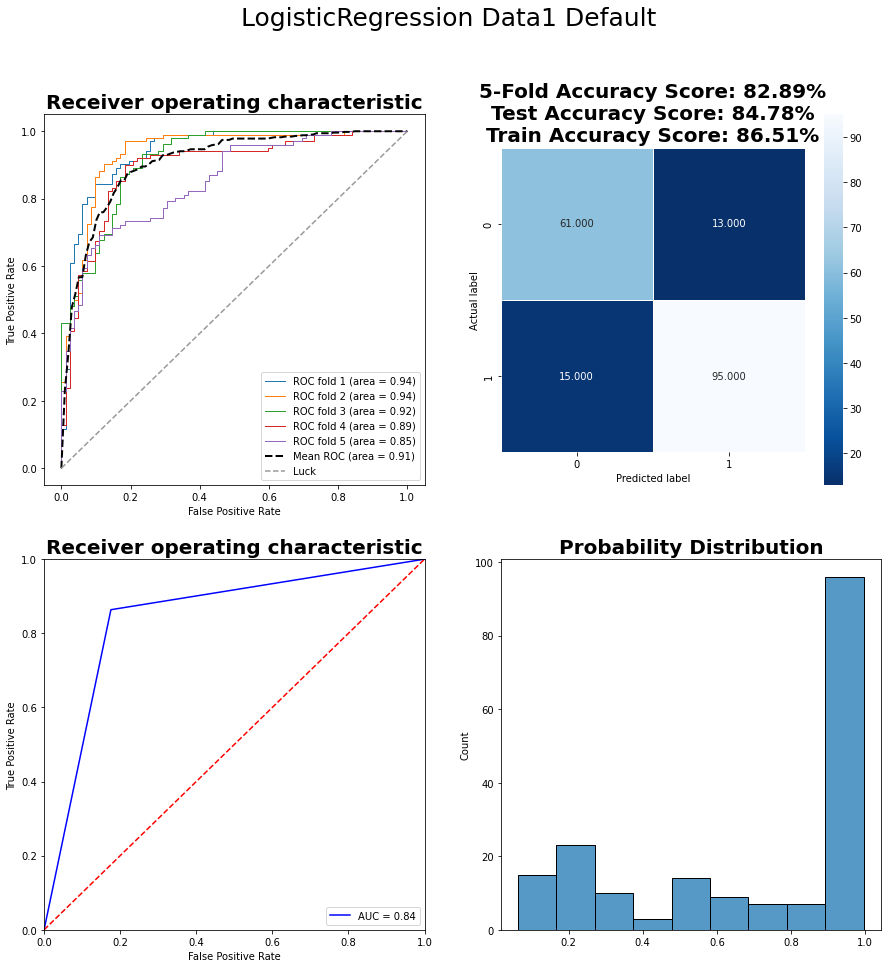

In [17]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=1000000)
build_model(log_reg,X1_train,y1_train,X1_test,y1_test,data1,y,label='Data1 Default')

C:\Users\G_MAN\.conda\envs\pymc_env\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


              precision    recall  f1-score   support

           0       0.81      0.82      0.82        74
           1       0.88      0.87      0.88       110

    accuracy                           0.85       184
   macro avg       0.85      0.85      0.85       184
weighted avg       0.85      0.85      0.85       184

Specificity = 0.8243243243243243
The balanced accuracy score is : 84.85%


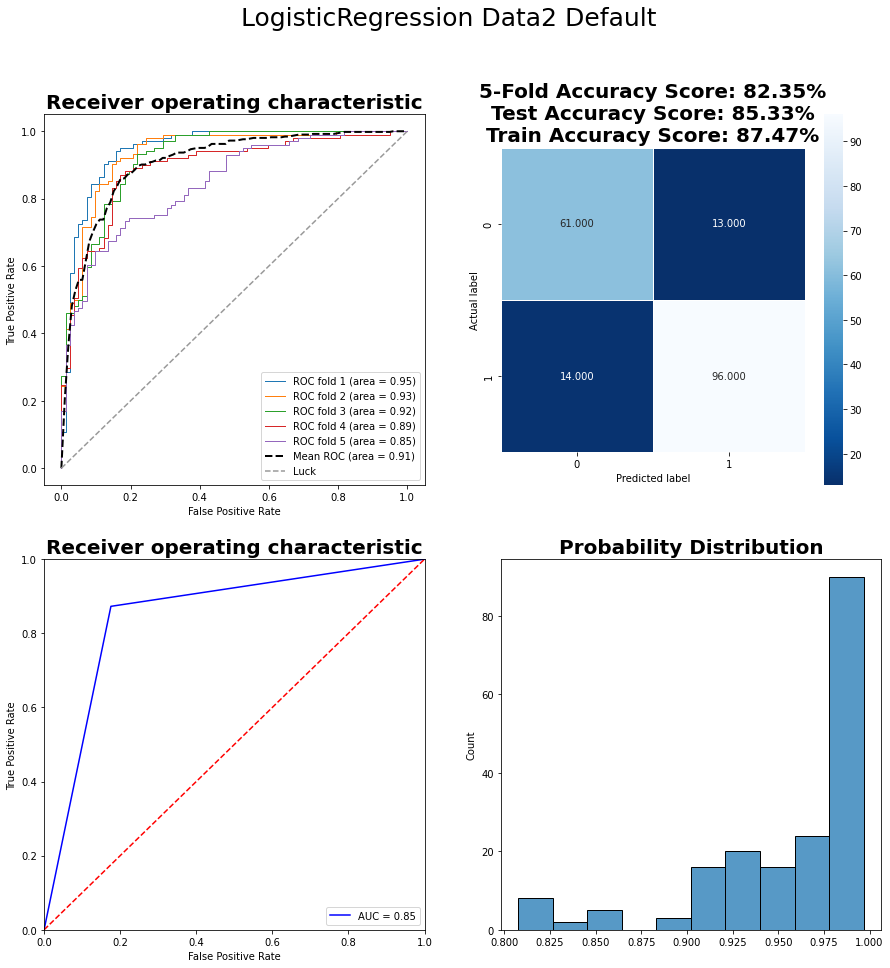

In [18]:
log_reg = LogisticRegression(max_iter=1000000)
build_model(log_reg,X2_train,y2_train,X2_test,y2_test,data2,y,label='Data2 Default')

C:\Users\G_MAN\.conda\envs\pymc_env\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


              precision    recall  f1-score   support

           0       0.81      0.81      0.81        74
           1       0.87      0.87      0.87       110

    accuracy                           0.85       184
   macro avg       0.84      0.84      0.84       184
weighted avg       0.85      0.85      0.85       184

Specificity = 0.8108108108108109
The balanced accuracy score is : 84.18%


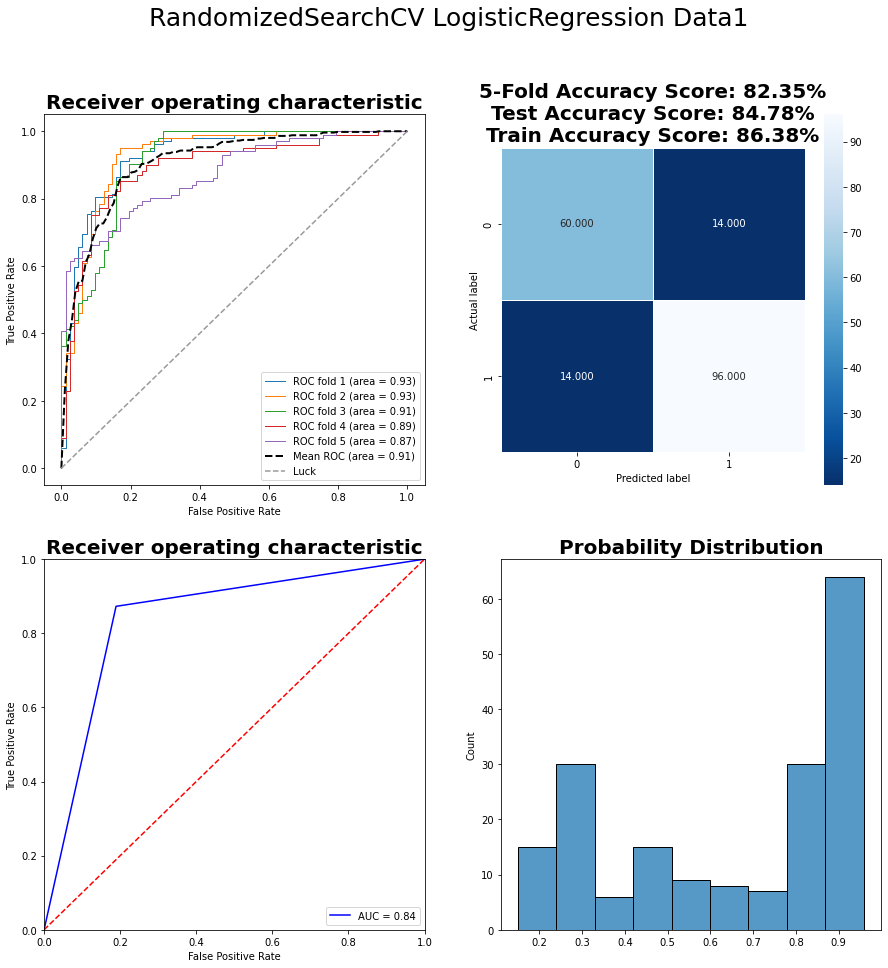

In [19]:
logRegGrid = {
    'penalty': ['elasticnet'],
    'solver': ['saga'],
    'fit_intercept': [True,False],
    'class_weight': ['balanced',None],
    'tol': [.0001, .01, 1, 10, 100],
    'C': [.01, 1, 10, 100],
    'l1_ratio': np.linspace(0,1,num=10),
    'n_jobs':[-1]
}

log_reg = LogisticRegression(max_iter=1000000)
build_model(log_reg,X1_train,y1_train,X1_test,y1_test,data1,y,params=logRegGrid,label='Data1')

C:\Users\G_MAN\.conda\envs\pymc_env\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


              precision    recall  f1-score   support

           0       0.81      0.82      0.82        74
           1       0.88      0.87      0.88       110

    accuracy                           0.85       184
   macro avg       0.85      0.85      0.85       184
weighted avg       0.85      0.85      0.85       184

Specificity = 0.8243243243243243
The balanced accuracy score is : 84.85%


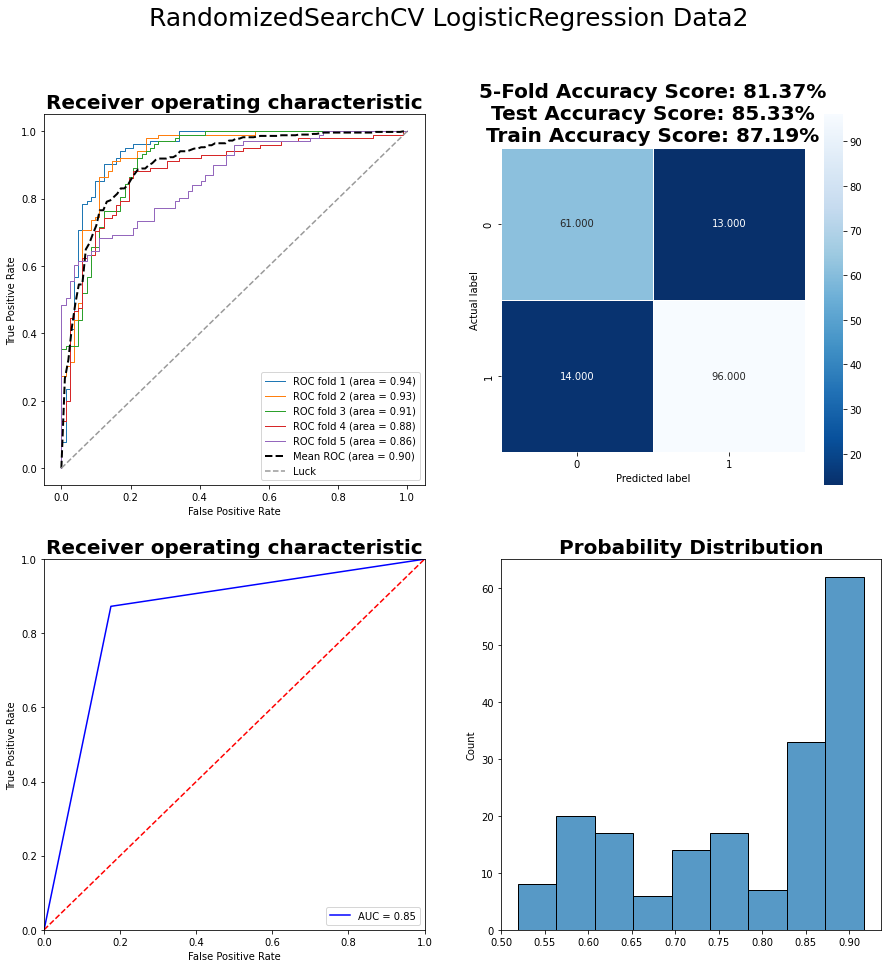

In [20]:
log_reg = LogisticRegression(max_iter=1000000)
build_model(log_reg,X2_train,y2_train,X2_test,y2_test,data2,y,params=logRegGrid,label='Data2')

### Logistic Regression Feature Selection - Sequential Feature Selector
Feature selection was also conducted by way of sequential feature selection. This methodology adds the feature that
adds the most in predictive power in a sequential manner until there is no further improvement. As shown below, 5 of 11
features were selected, Age, Sex, ChestPainType, ExcerciseAngina, and ST_Slope as the most significant predictors
towards heart disease. In fact when perform a logistic regression on the features alone, it achieves comparable metrics
as when using all the available features.

['Age' 'Sex' 'ChestPainType' 'ExerciseAngina' 'ST_Slope']


C:\Users\G_MAN\.conda\envs\pymc_env\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SequentialFeatureSelector was fitted with feature names
  warnings.warn(
C:\Users\G_MAN\.conda\envs\pymc_env\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SequentialFeatureSelector was fitted with feature names
  warnings.warn(


              precision    recall  f1-score   support

           0       0.79      0.82      0.81        74
           1       0.88      0.85      0.87       110

    accuracy                           0.84       184
   macro avg       0.84      0.84      0.84       184
weighted avg       0.84      0.84      0.84       184

Specificity = 0.8243243243243243
The balanced accuracy score is : 83.94%


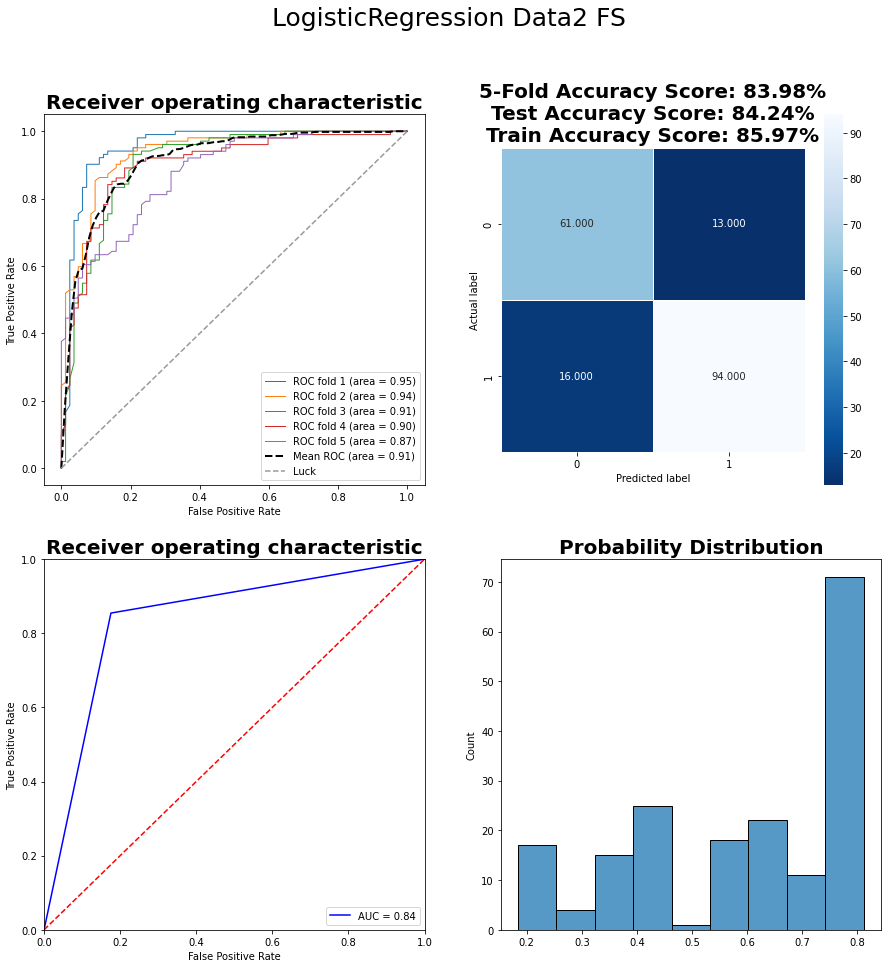

In [21]:
from sklearn.feature_selection import SequentialFeatureSelector
sfs = SequentialFeatureSelector(log_reg,n_jobs=-1,cv=cv,scoring='roc_auc')
sfs.fit(data2, y)
print(sfs.get_feature_names_out())
build_model(log_reg,sfs.transform(X2_train),y2_train,sfs.transform(X2_test),y2_test,
            pd.DataFrame(sfs.transform(data2)),y,label='Data2 FS')

['Age' 'FastingBS' 'Oldpeak' 'Sex_F' 'Sex_M' 'ChestPainType_ASY'
 'ExerciseAngina_N' 'ST_Slope_Down' 'ST_Slope_Flat' 'ST_Slope_Up']


C:\Users\G_MAN\.conda\envs\pymc_env\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SequentialFeatureSelector was fitted with feature names
  warnings.warn(
C:\Users\G_MAN\.conda\envs\pymc_env\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SequentialFeatureSelector was fitted with feature names
  warnings.warn(


              precision    recall  f1-score   support

           0       0.79      0.82      0.81        74
           1       0.88      0.85      0.87       110

    accuracy                           0.84       184
   macro avg       0.84      0.84      0.84       184
weighted avg       0.84      0.84      0.84       184

Specificity = 0.8243243243243243
The balanced accuracy score is : 83.94%


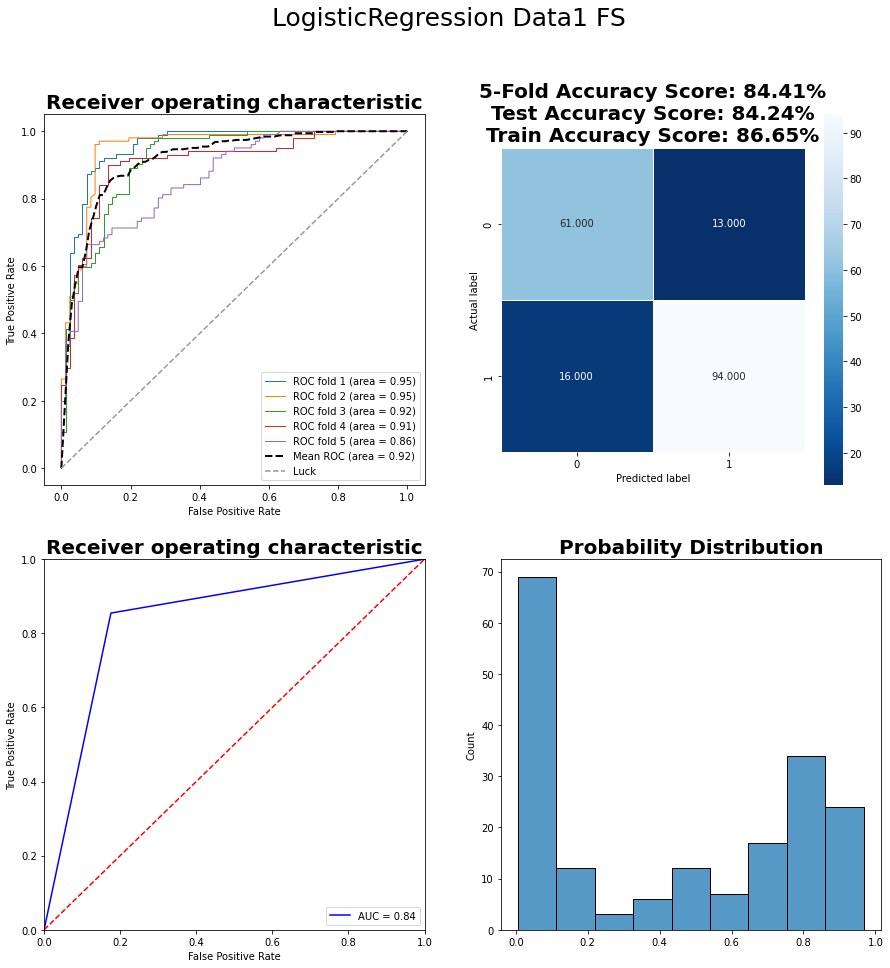

In [22]:
sfs = SequentialFeatureSelector(log_reg,n_jobs=-1,cv=cv,scoring='roc_auc')
sfs.fit(data1, y)
print(sfs.get_feature_names_out())
build_model(log_reg,sfs.transform(X1_train),y1_train,sfs.transform(X1_test),y1_test,
            pd.DataFrame(sfs.transform(data1)),y,label='Data1 FS')

## Random Forest Classifier
The random forest models performed just as well as the logistic regression models. The test accuracy and AUC scores are
comparable to the logistic regression.  One advantage over logistic regression is that it seems to have a balanced ratio
between predicting heart disease or not. It does not seem to favor one prediction over the other. It seems this is a
more generalizable model. This can be further confirmed by the two opposing peaks in the probability distribution.

C:\Users\G_MAN\.conda\envs\pymc_env\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


              precision    recall  f1-score   support

           0       0.85      0.82      0.84        74
           1       0.88      0.90      0.89       110

    accuracy                           0.87       184
   macro avg       0.87      0.86      0.86       184
weighted avg       0.87      0.87      0.87       184

Specificity = 0.8243243243243243
The balanced accuracy score is : 86.22%


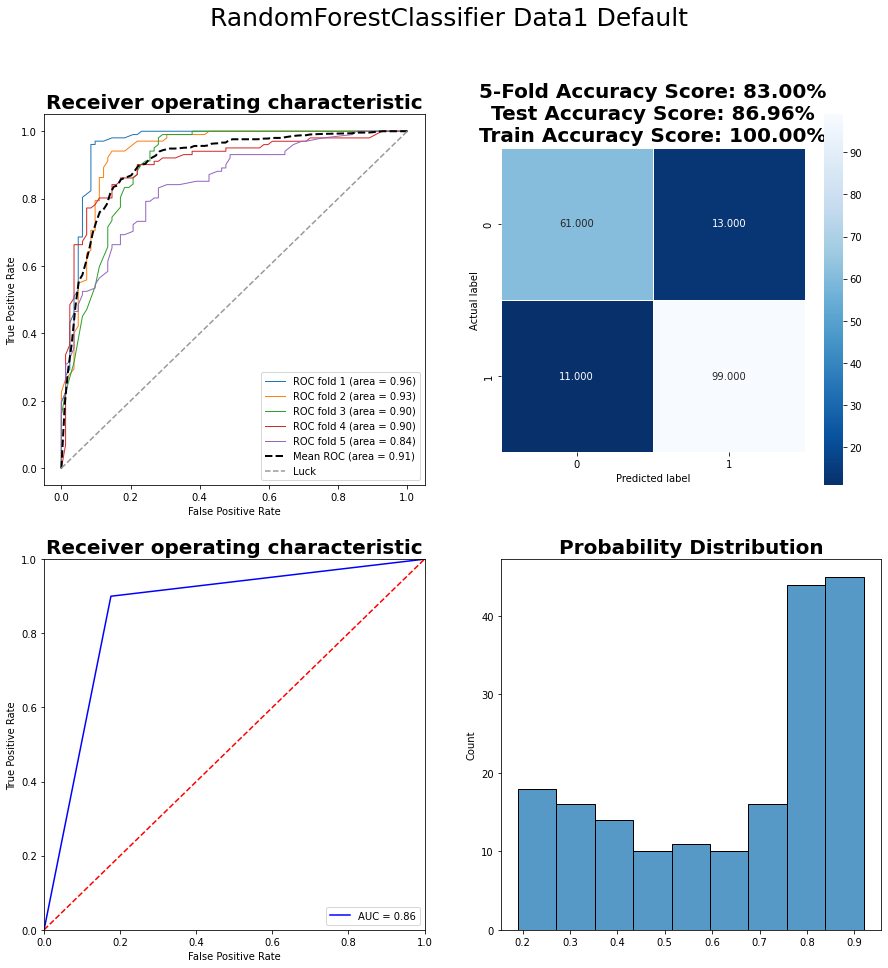

In [23]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100, random_state=32, n_jobs=-1)

build_model(rfc,X1_train,y1_train,X1_test,y1_test,data1,y,label='Data1 Default')

C:\Users\G_MAN\.conda\envs\pymc_env\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


              precision    recall  f1-score   support

           0       0.82      0.81      0.82        74
           1       0.87      0.88      0.88       110

    accuracy                           0.85       184
   macro avg       0.85      0.85      0.85       184
weighted avg       0.85      0.85      0.85       184

Specificity = 0.8108108108108109
The balanced accuracy score is : 84.63%


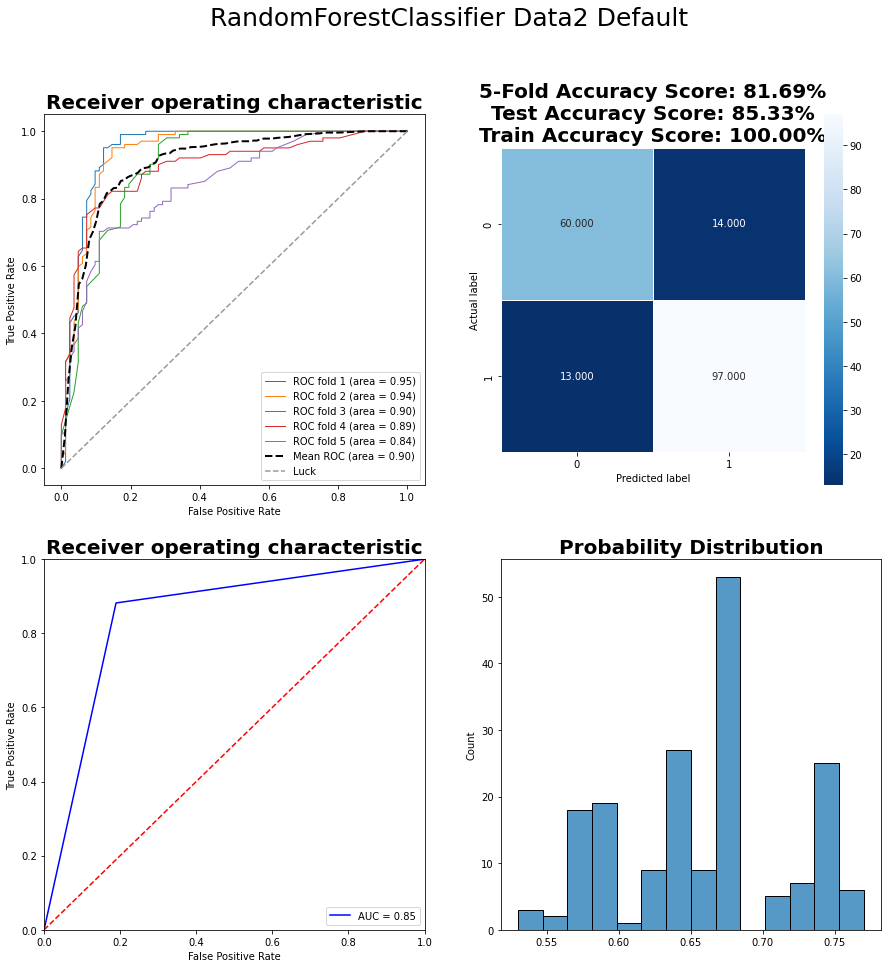

In [24]:
rfc = RandomForestClassifier(n_estimators=100, random_state=32, n_jobs=-1)

build_model(rfc,X2_train,y2_train,X2_test,y2_test,data2,y,label='Data2 Default')

C:\Users\G_MAN\.conda\envs\pymc_env\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


              precision    recall  f1-score   support

           0       0.87      0.84      0.86        74
           1       0.89      0.92      0.91       110

    accuracy                           0.89       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.89      0.89      0.89       184

Specificity = 0.8378378378378378
The balanced accuracy score is : 87.80%


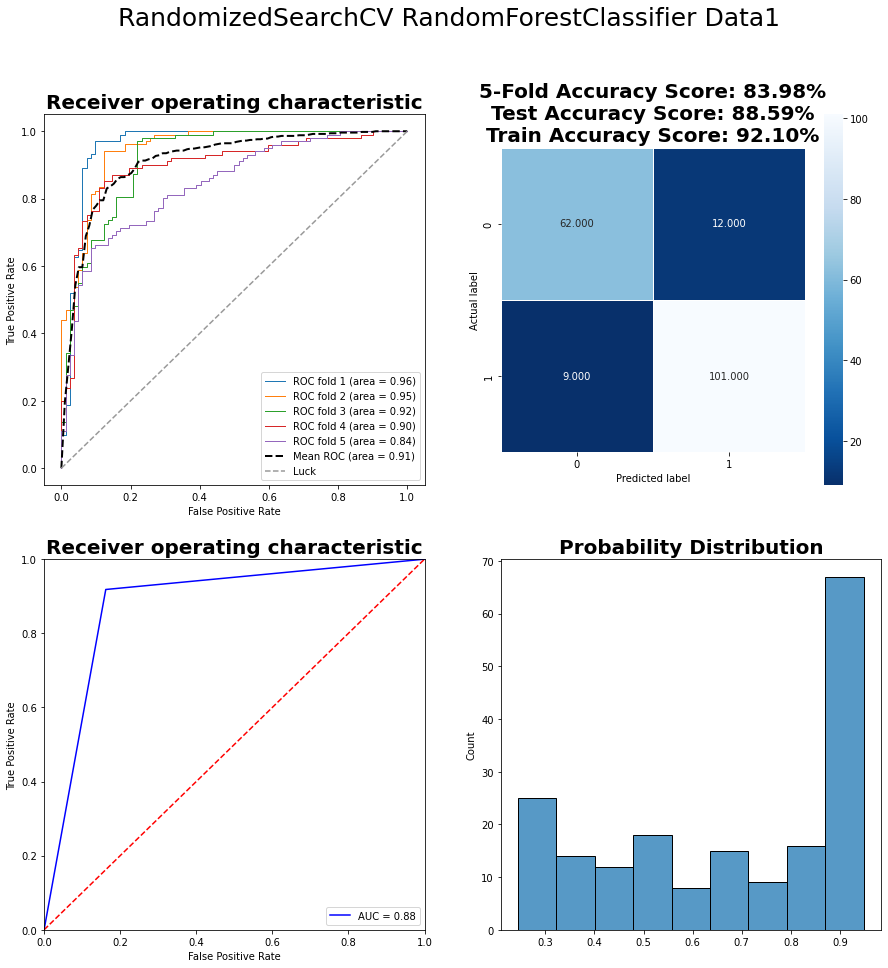

In [25]:
rfc_params = {
    'max_depth': [3, 7, 10, 50, 100],
    'min_samples_split' : [ 3, 7, 10, 50, 100],
    'min_samples_leaf' : [ 3, 7, 10, 50, 100],
    'max_leaf_nodes' : [ 3, 7, 10, 50, 100],
    'criterion': ['entropy','gini']
}

rfc = RandomForestClassifier(n_estimators=100, random_state=32, n_jobs=-1)

build_model(rfc,X1_train,y1_train,X1_test,y1_test,data1,y,params=rfc_params,label='Data1')

C:\Users\G_MAN\.conda\envs\pymc_env\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


              precision    recall  f1-score   support

           0       0.85      0.81      0.83        74
           1       0.88      0.90      0.89       110

    accuracy                           0.86       184
   macro avg       0.86      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184

Specificity = 0.8108108108108109
The balanced accuracy score is : 85.54%


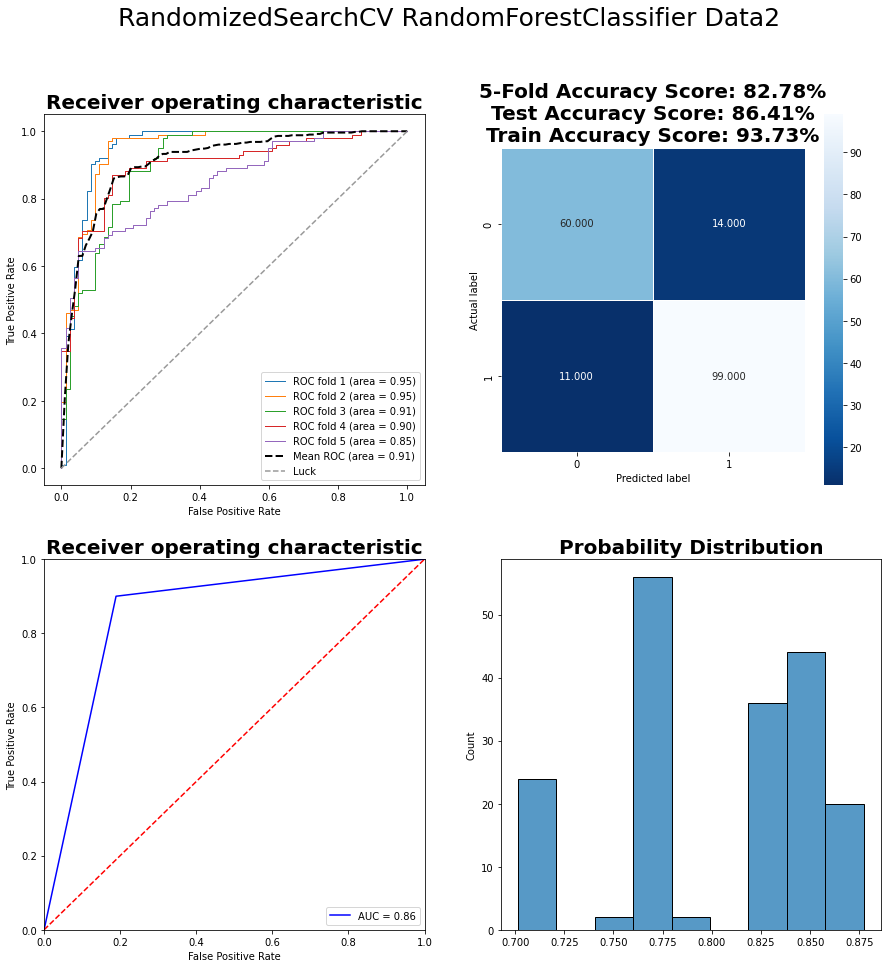

In [26]:
rfc = RandomForestClassifier(n_estimators=100, random_state=32, n_jobs=-1)

build_model(rfc,X2_train,y2_train,X2_test,y2_test,data2,y,params=rfc_params,label='Data2')


### Random Forest Feature Selection - Sequential Feature Selection
Feature selection was also conducted using the random forest classifier and a sequential feature selection. There were
multiple features that were selected that were also selected in the logistic regression feature selection. Feature
selection involved 6 variables, Sex, ChestPainType, FastingBS, OldPeak, and ST_Slope.  Sex, ChestPainType and ST_Slope
were also selected by the logistic regression model. This adds evidence that these features are important in determining
heart disease.


['Sex' 'ChestPainType' 'FastingBS' 'Oldpeak' 'ST_Slope']


C:\Users\G_MAN\.conda\envs\pymc_env\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SequentialFeatureSelector was fitted with feature names
  warnings.warn(
C:\Users\G_MAN\.conda\envs\pymc_env\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SequentialFeatureSelector was fitted with feature names
  warnings.warn(


              precision    recall  f1-score   support

           0       0.77      0.85      0.81        74
           1       0.89      0.83      0.86       110

    accuracy                           0.84       184
   macro avg       0.83      0.84      0.83       184
weighted avg       0.84      0.84      0.84       184

Specificity = 0.8513513513513513
The balanced accuracy score is : 83.93%


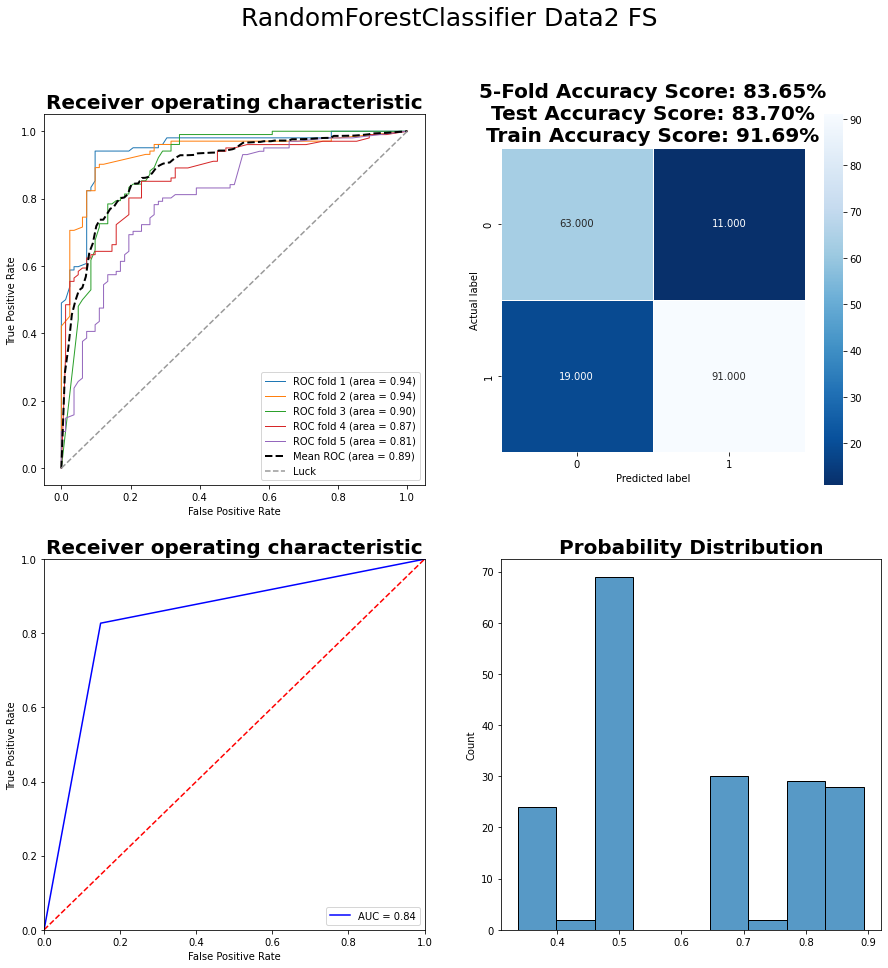

In [27]:
sfs = SequentialFeatureSelector(rfc,n_jobs=-1,cv=cv,scoring='roc_auc')
sfs.fit(data2, y)
print(sfs.get_feature_names_out())
build_model(rfc,sfs.transform(X2_train),y2_train,sfs.transform(X2_test),y2_test,
            pd.DataFrame(sfs.transform(data2)),y,label='Data2 FS')

['FastingBS' 'Sex_F' 'Sex_M' 'ChestPainType_ASY' 'ChestPainType_ATA'
 'ChestPainType_NAP' 'ChestPainType_TA' 'RestingECG_ST' 'ST_Slope_Down'
 'ST_Slope_Up']


C:\Users\G_MAN\.conda\envs\pymc_env\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SequentialFeatureSelector was fitted with feature names
  warnings.warn(
C:\Users\G_MAN\.conda\envs\pymc_env\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SequentialFeatureSelector was fitted with feature names
  warnings.warn(


              precision    recall  f1-score   support

           0       0.76      0.84      0.79        74
           1       0.88      0.82      0.85       110

    accuracy                           0.83       184
   macro avg       0.82      0.83      0.82       184
weighted avg       0.83      0.83      0.83       184

Specificity = 0.8378378378378378
The balanced accuracy score is : 82.80%


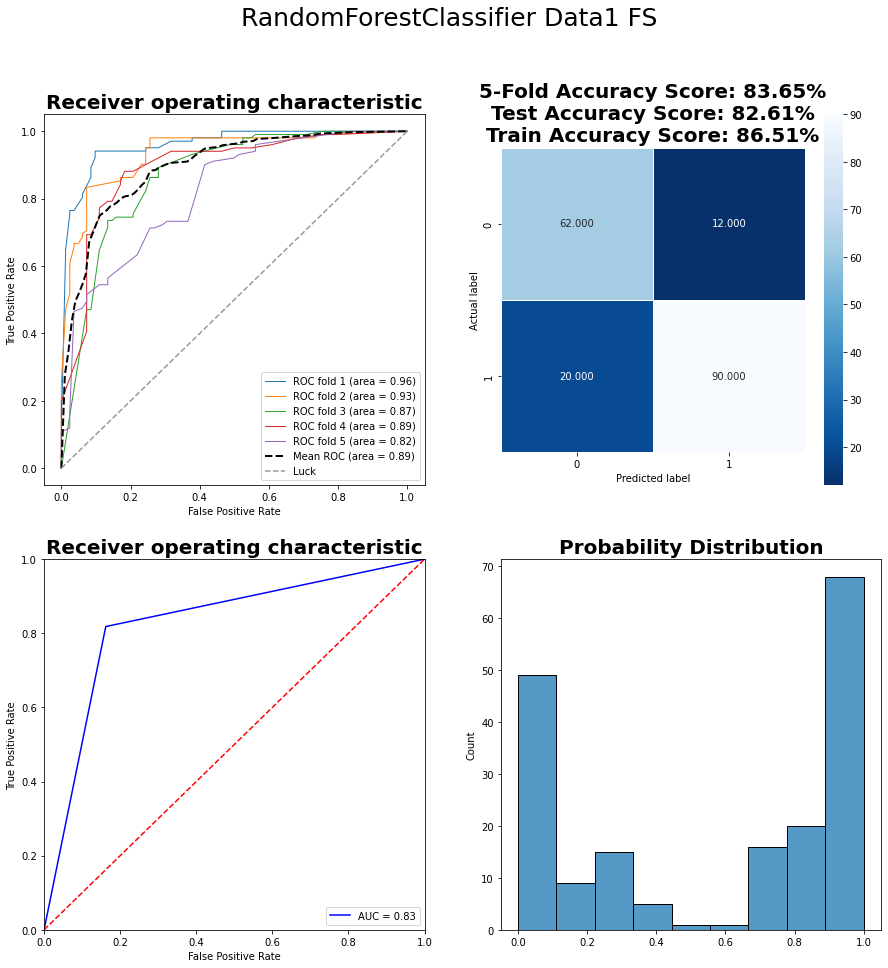

In [28]:
sfs = SequentialFeatureSelector(rfc,n_jobs=-1,cv=cv,scoring='roc_auc')
sfs.fit(data1, y)
print(sfs.get_feature_names_out())
build_model(rfc,sfs.transform(X1_train),y1_train,sfs.transform(X1_test),y1_test,
            pd.DataFrame(sfs.transform(data1)),y,label='Data1 FS')


## Support Vector Machines
Support Vector machine performed just as well as the previous models. The only downside is that the probabilities are
close to the threshold, meaning that each prediction is not strong. This model also took the longest to train without
adding much to the accuracy.

C:\Users\G_MAN\.conda\envs\pymc_env\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


              precision    recall  f1-score   support

           0       0.81      0.82      0.82        74
           1       0.88      0.87      0.88       110

    accuracy                           0.85       184
   macro avg       0.85      0.85      0.85       184
weighted avg       0.85      0.85      0.85       184

Specificity = 0.8243243243243243
The balanced accuracy score is : 84.85%


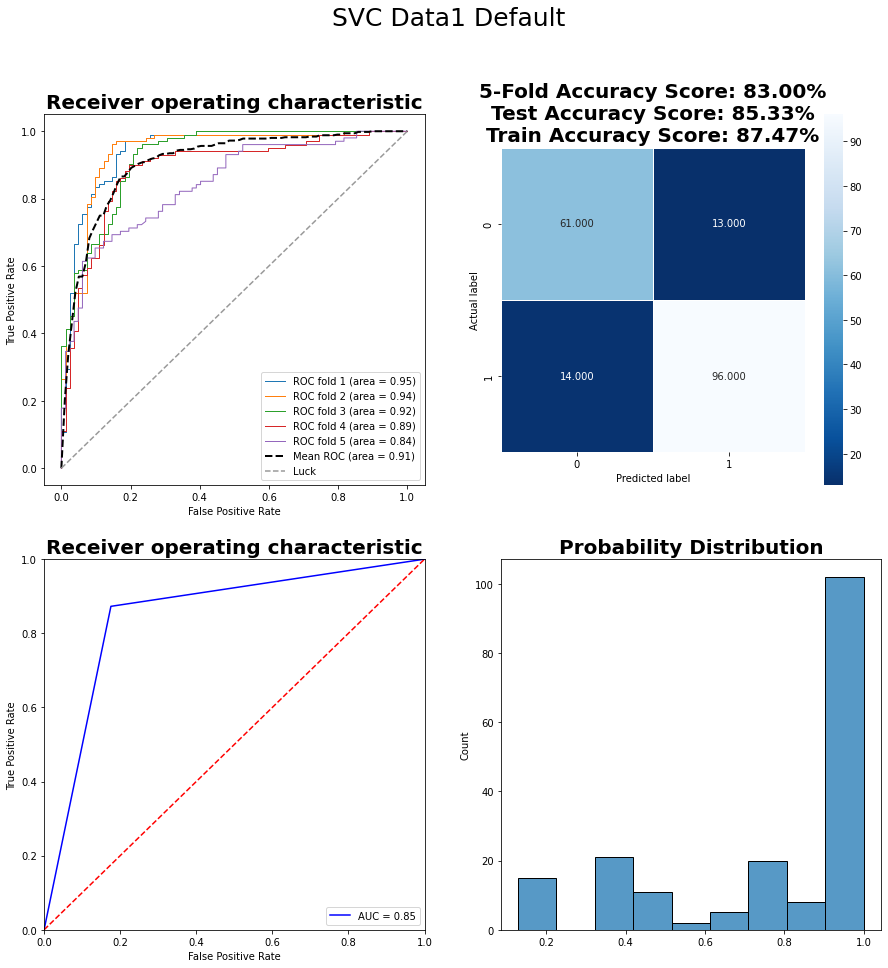

In [29]:
from sklearn.svm import SVC

svc = SVC(kernel ='linear',probability=True)
build_model(svc,X1_train,y1_train,X1_test,y1_test,data1,y,label='Data1 Default')

C:\Users\G_MAN\.conda\envs\pymc_env\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


              precision    recall  f1-score   support

           0       0.81      0.84      0.82        74
           1       0.89      0.86      0.88       110

    accuracy                           0.85       184
   macro avg       0.85      0.85      0.85       184
weighted avg       0.85      0.85      0.85       184

Specificity = 0.8378378378378378
The balanced accuracy score is : 85.07%


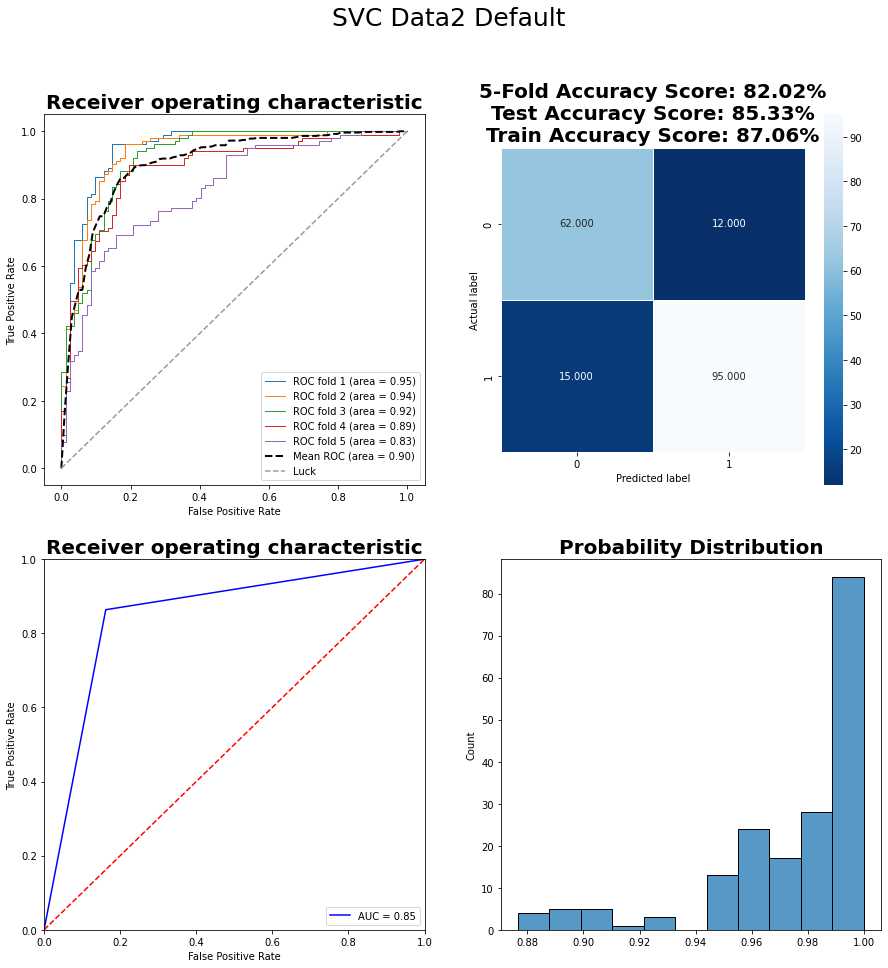

In [30]:
svc = SVC(kernel ='linear',probability=True)
build_model(svc,X2_train,y2_train,X2_test,y2_test,data2,y,label='Data2 Default')

In [31]:
svc_params ={
  'C': [1, 10, 100, 1000],
  'gamma': [0.001, 0.01, 0.1, 1]
}
svc = SVC(kernel='linear',probability=True)
# Takes a long time
# build_model(svc,X1_train,y1_train,X1_test,y1_test,data1,y,label='Data1',params=svc_params)

In [32]:
svc = SVC(kernel='linear',probability=True)
# Takes a long time
# build_model(svc,X2_train,y2_train,X2_test,y2_test,data2,y,label='Data2',params=svc_params)

### SVC Feature Selection - Sequential Feature Selection
The feature selection keeps selecting the same 3-5 features indicating that these features,
Sex, ChestPainType, MaxHR, OldPeak, and ST_Slope are important predictors towards predicting heart disease.

['Sex' 'ChestPainType' 'MaxHR' 'Oldpeak' 'ST_Slope']


C:\Users\G_MAN\.conda\envs\pymc_env\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SequentialFeatureSelector was fitted with feature names
  warnings.warn(
C:\Users\G_MAN\.conda\envs\pymc_env\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SequentialFeatureSelector was fitted with feature names
  warnings.warn(


              precision    recall  f1-score   support

           0       0.77      0.76      0.76        74
           1       0.84      0.85      0.84       110

    accuracy                           0.81       184
   macro avg       0.80      0.80      0.80       184
weighted avg       0.81      0.81      0.81       184

Specificity = 0.7567567567567568
The balanced accuracy score is : 80.11%


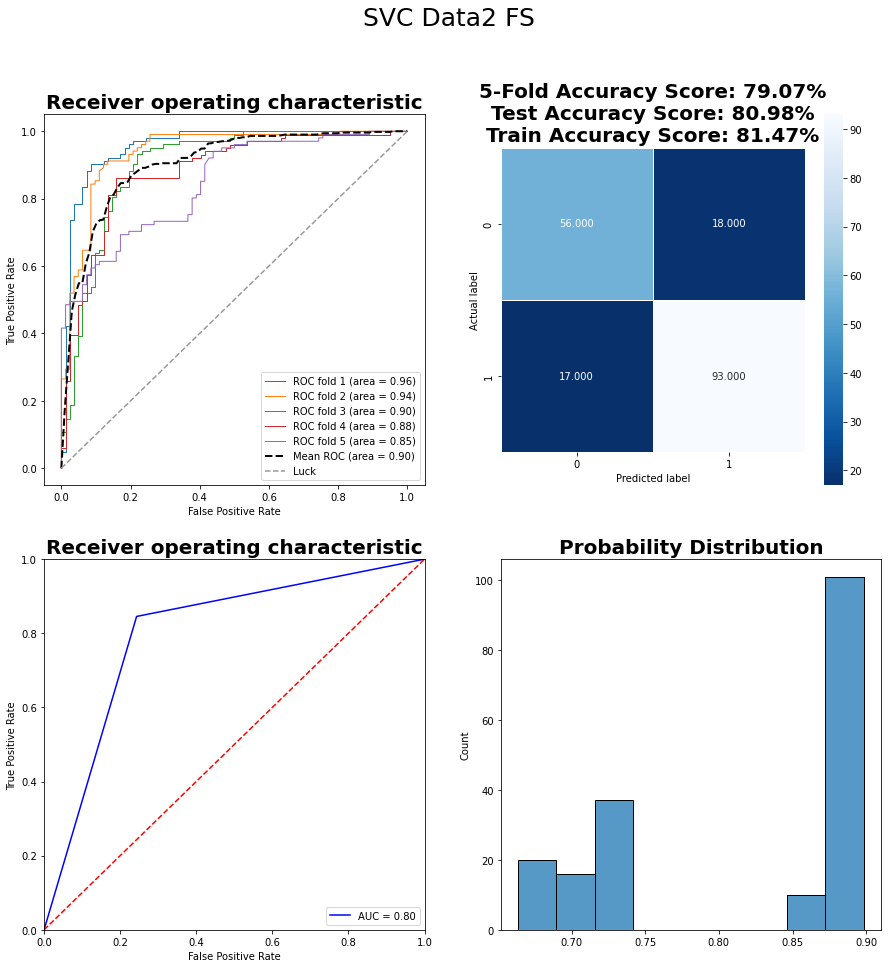

In [33]:
svc = SVC(kernel ='linear',probability=True)
sfs = SequentialFeatureSelector(svc,n_jobs=-1,cv=cv,scoring='roc_auc')
sfs.fit(data2, y)
print(sfs.get_feature_names_out())
build_model(svc,sfs.transform(X2_train),y2_train,sfs.transform(X2_test),y2_test,
            pd.DataFrame(sfs.transform(data2)),y,label='Data2 FS')

['FastingBS' 'MaxHR' 'Oldpeak' 'Sex_F' 'Sex_M' 'ChestPainType_ASY'
 'ExerciseAngina_N' 'ExerciseAngina_Y' 'ST_Slope_Flat' 'ST_Slope_Up']


C:\Users\G_MAN\.conda\envs\pymc_env\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SequentialFeatureSelector was fitted with feature names
  warnings.warn(
C:\Users\G_MAN\.conda\envs\pymc_env\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SequentialFeatureSelector was fitted with feature names
  warnings.warn(


              precision    recall  f1-score   support

           0       0.77      0.82      0.80        74
           1       0.88      0.84      0.86       110

    accuracy                           0.83       184
   macro avg       0.82      0.83      0.83       184
weighted avg       0.83      0.83      0.83       184

Specificity = 0.8243243243243243
The balanced accuracy score is : 83.03%


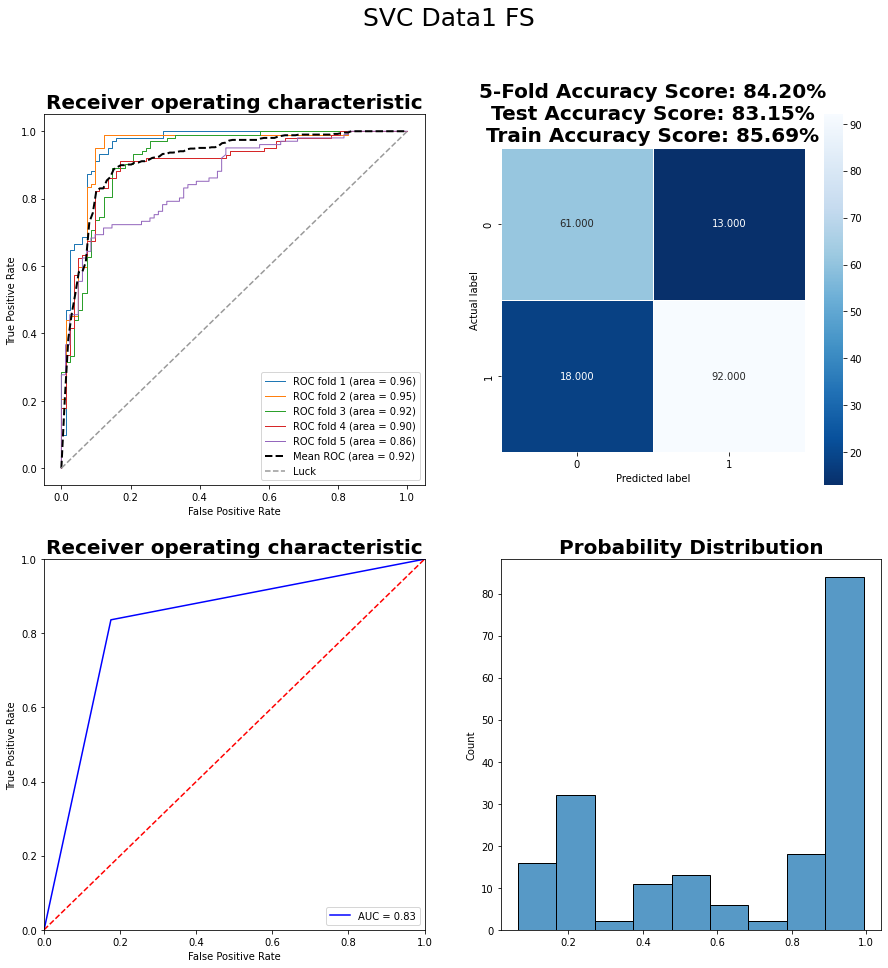

In [34]:
svc = SVC(kernel ='linear',probability=True)
sfs = SequentialFeatureSelector(svc,n_jobs=-1,cv=cv,scoring='roc_auc')
sfs.fit(data1, y)
print(sfs.get_feature_names_out())
build_model(svc,sfs.transform(X1_train),y1_train,sfs.transform(X1_test),y1_test,
            pd.DataFrame(sfs.transform(data1)),y,label='Data1 FS')


## XGBoost
As stated previously in the notebook, the dataset is unbalanced where 55% had heart disease and 44% were normal. One of
the benefits of using XGBoost is that it has an attribute that can take the unbalanced nature of the dataset into
consideration and yield a more balanced generalizable model. As seen in the results, XGBoost achieves comparable
performance metrics with balanced ratio in the confusion matrix between correctly identified classes.

C:\Users\G_MAN\.conda\envs\pymc_env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:10:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:10:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\G_MAN\.conda\envs\pymc_env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\G_MAN\.conda\envs\pymc_env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:10:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\G_MAN\.conda\envs\pymc_env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:10:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\G_MAN\.conda\envs\pymc_env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:10:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\G_MAN\.conda\envs\pymc_env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:10:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.81      0.80      0.80        74
           1       0.86      0.87      0.87       110

    accuracy                           0.84       184
   macro avg       0.84      0.84      0.84       184
weighted avg       0.84      0.84      0.84       184

Specificity = 0.7972972972972973
The balanced accuracy score is : 83.50%


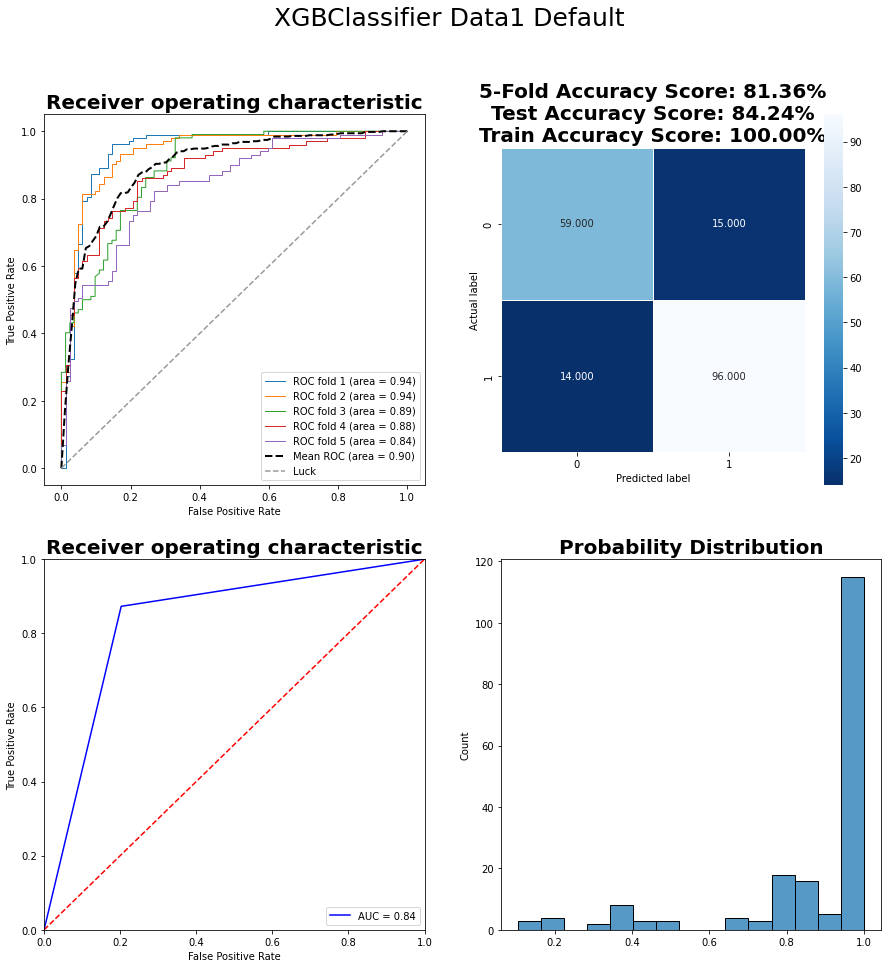

In [35]:
from xgboost import XGBClassifier
scale_pos = y.value_counts()[1]/y.value_counts()[0]

xgbc = XGBClassifier(objective='binary:logistic',n_jobs=-1,scale_pos_weight=scale_pos)
build_model(xgbc,X1_train,y1_train,X1_test,y1_test,data1,y,label='Data1 Default')

C:\Users\G_MAN\.conda\envs\pymc_env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:10:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\G_MAN\.conda\envs\pymc_env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\G_MAN\.conda\envs\pymc_env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:10:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:10:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\G_MAN\.conda\envs\pymc_env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:10:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\G_MAN\.conda\envs\pymc_env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:10:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\G_MAN\.conda\envs\pymc_env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:10:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.78      0.80      0.79        74
           1       0.86      0.85      0.85       110

    accuracy                           0.83       184
   macro avg       0.82      0.82      0.82       184
weighted avg       0.83      0.83      0.83       184

Specificity = 0.7972972972972973
The balanced accuracy score is : 82.14%


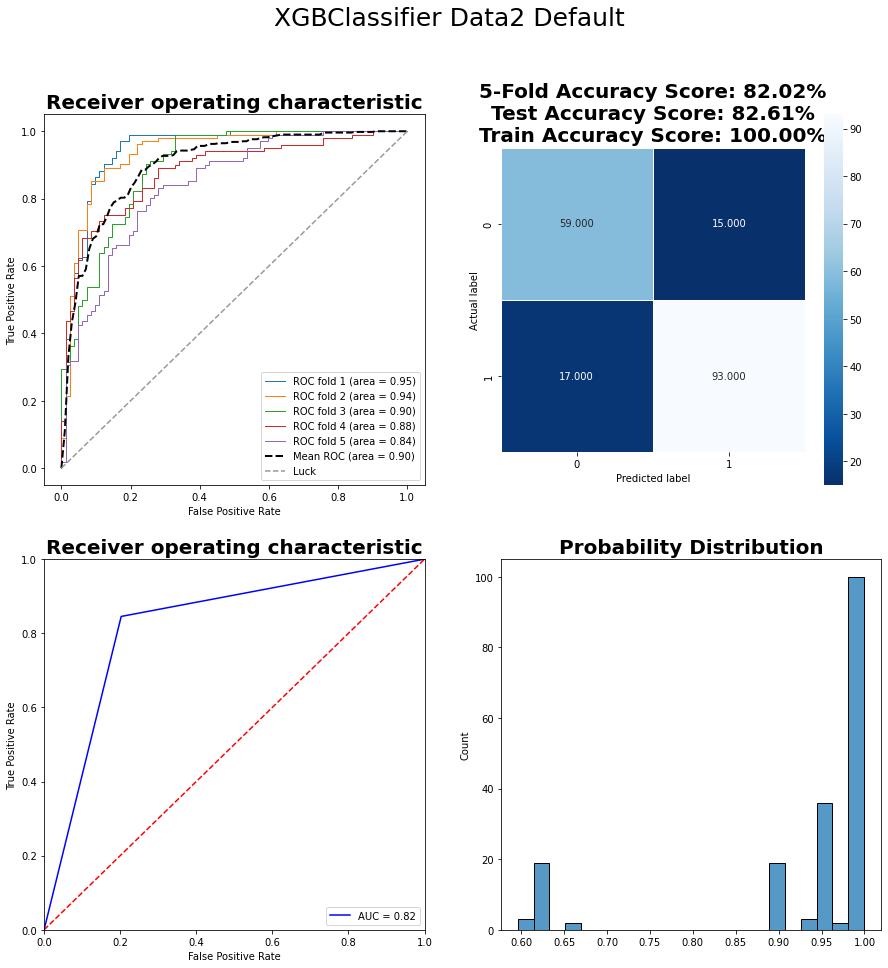

In [36]:
xgbc = XGBClassifier(objective='binary:logistic',n_jobs=-1,scale_pos_weight=scale_pos)
build_model(xgbc,X2_train,y2_train,X2_test,y2_test,data2,y,label='Data2 Default')

C:\Users\G_MAN\.conda\envs\pymc_env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:12:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\G_MAN\.conda\envs\pymc_env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:13:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\G_MAN\.conda\envs\pymc_env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:14:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\G_MAN\.conda\envs\pymc_env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:15:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\G_MAN\.conda\envs\pymc_env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:16:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\G_MAN\.conda\envs\pymc_env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:17:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.86      0.81      0.83        74
           1       0.88      0.91      0.89       110

    accuracy                           0.87       184
   macro avg       0.87      0.86      0.86       184
weighted avg       0.87      0.87      0.87       184

Specificity = 0.8108108108108109
The balanced accuracy score is : 86.00%


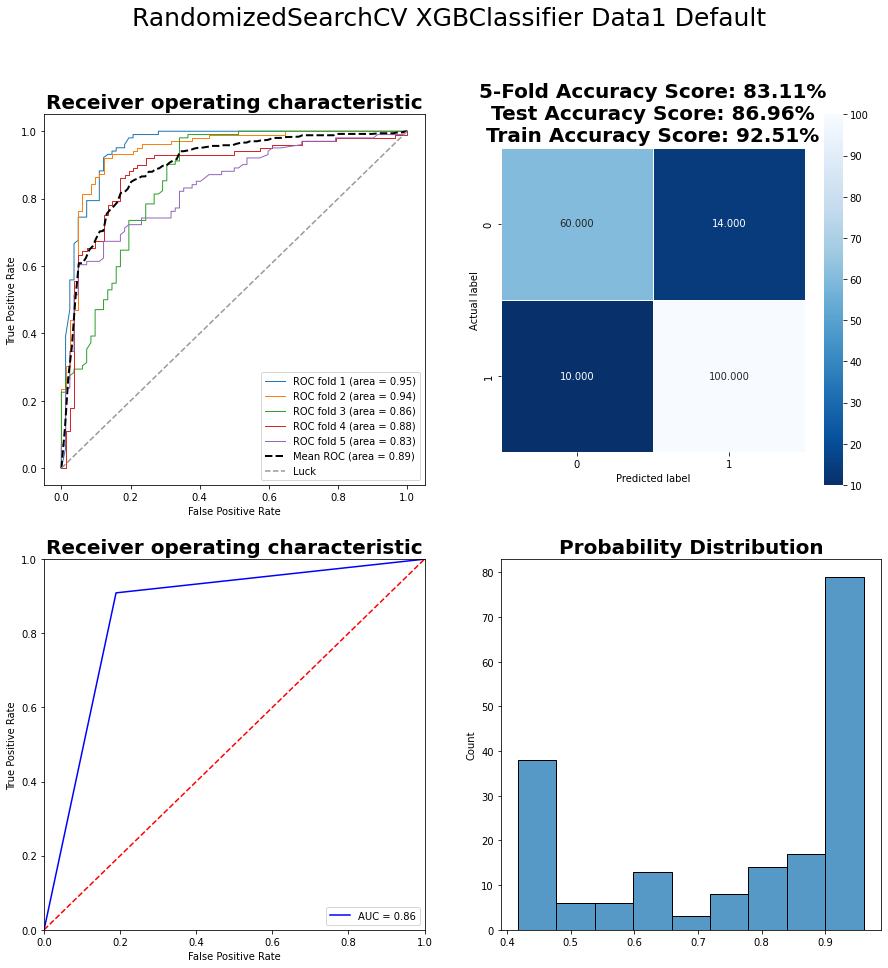

In [37]:
xgbc_param = {'gamma': [0,0.1,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4, 200],
              'learning_rate': [0.01, 0.03, 0.06, 0.1, 0.15, 0.2, 0.25, 0.4, 0.6, 0.7, 1],
              'max_depth': [5,6,7,8,9,10,11,12,13,14],
              'n_estimators': [50,65,80,100,115,130,150],
              'reg_alpha': [0,0.1,0.8,1.6,3.2,6.4,12.8,51.2,102.4,200],
              'reg_lambda': [0,0.1,0.8,1.6,3.2,6.4,12.8,51.2,102.4,200]}

xgbc = XGBClassifier(objective='binary:logistic',n_jobs=-1,scale_pos_weight=scale_pos)
build_model(xgbc,X1_train,y1_train,X1_test,y1_test,data1,y,label='Data1 Default',params=xgbc_param)

C:\Users\G_MAN\.conda\envs\pymc_env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:19:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\G_MAN\.conda\envs\pymc_env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:19:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\G_MAN\.conda\envs\pymc_env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:21:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\G_MAN\.conda\envs\pymc_env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:22:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\G_MAN\.conda\envs\pymc_env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:23:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\G_MAN\.conda\envs\pymc_env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:25:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.86      0.84      0.85        74
           1       0.89      0.91      0.90       110

    accuracy                           0.88       184
   macro avg       0.88      0.87      0.88       184
weighted avg       0.88      0.88      0.88       184

Specificity = 0.8378378378378378
The balanced accuracy score is : 87.35%


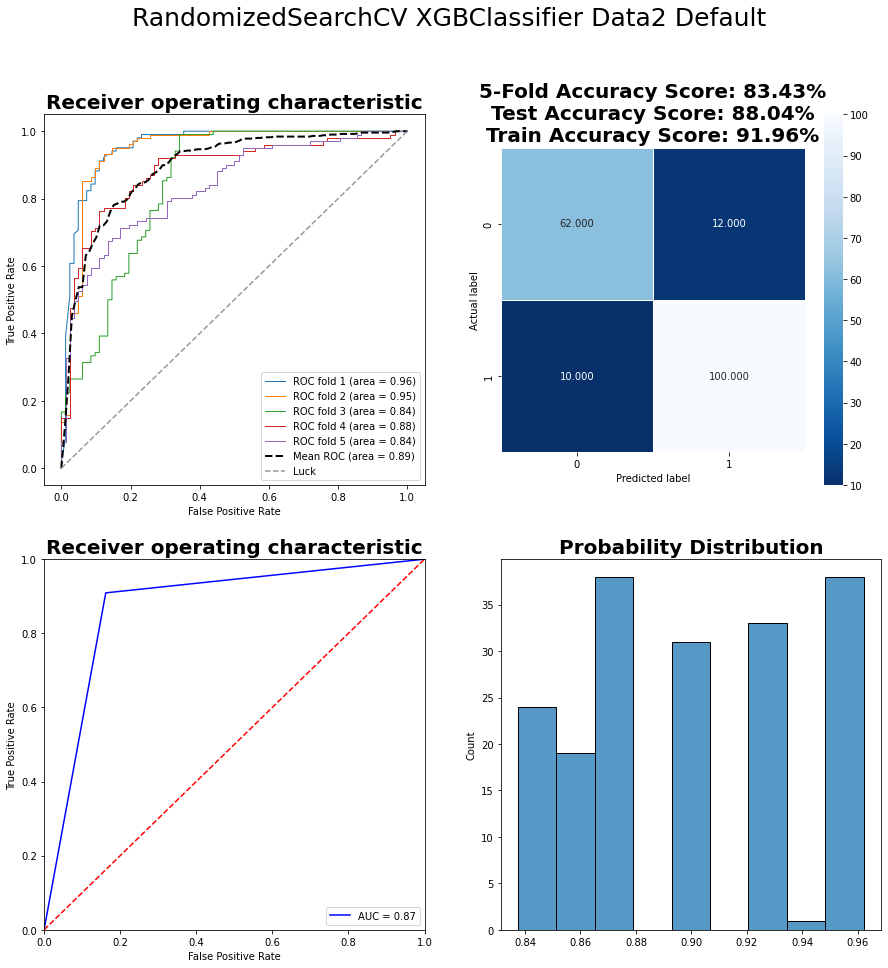

In [38]:
xgbc = XGBClassifier(objective='binary:logistic',n_jobs=-1,scale_pos_weight=scale_pos)
build_model(xgbc,X2_train,y2_train,X2_test,y2_test,data2,y,label='Data2 Default',params=xgbc_param)

### XGBClassifier Feature Selection - Sequential Feature Selection

The same five features are selected again by way of gradient boosting.

['Sex' 'ChestPainType' 'FastingBS' 'Oldpeak' 'ST_Slope']
[20:26:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\G_MAN\.conda\envs\pymc_env\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SequentialFeatureSelector was fitted with feature names
  warnings.warn(
C:\Users\G_MAN\.conda\envs\pymc_env\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SequentialFeatureSelector was fitted with feature names
  warnings.warn(
C:\Users\G_MAN\.conda\envs\pymc_env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\G_MAN\.conda\envs\pymc_env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifi

[20:26:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\G_MAN\.conda\envs\pymc_env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:26:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\G_MAN\.conda\envs\pymc_env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:26:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\G_MAN\.conda\envs\pymc_env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\G_MAN\.conda\envs\pymc_env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:26:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:26:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.77      0.81      0.79        74
           1       0.87      0.84      0.85       110

    accuracy                           0.83       184
   macro avg       0.82      0.82      0.82       184
weighted avg       0.83      0.83      0.83       184

Specificity = 0.8108108108108109
The balanced accurac

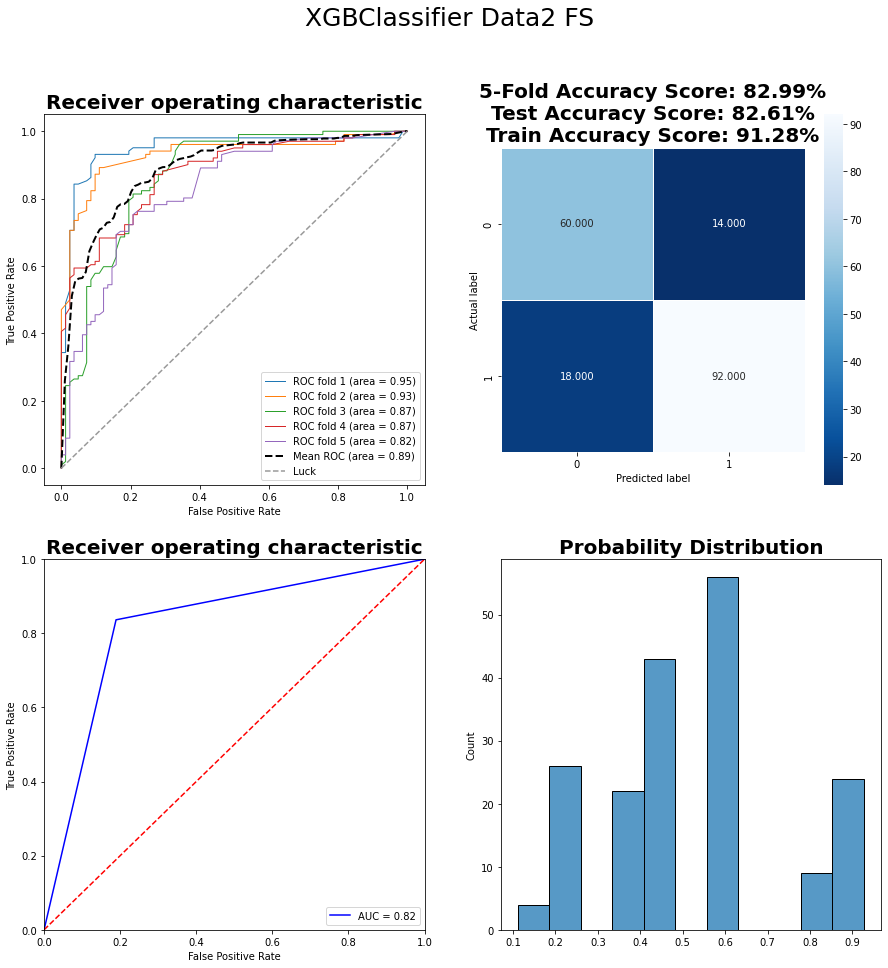

In [39]:
xgbc = XGBClassifier(objective='binary:logistic',n_jobs=-1,scale_pos_weight=scale_pos)
sfs = SequentialFeatureSelector(xgbc,n_jobs=-1,cv=cv,scoring='roc_auc')
sfs.fit(data2, y)
print(sfs.get_feature_names_out())
build_model(xgbc,sfs.transform(X2_train),y2_train,sfs.transform(X2_test),y2_test,
            pd.DataFrame(sfs.transform(data2)),y,label='Data2 FS')

['FastingBS' 'Sex_F' 'Sex_M' 'ChestPainType_ASY' 'ChestPainType_ATA'
 'ChestPainType_NAP' 'ChestPainType_TA' 'ST_Slope_Down' 'ST_Slope_Flat'
 'ST_Slope_Up']
[20:28:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\G_MAN\.conda\envs\pymc_env\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SequentialFeatureSelector was fitted with feature names
  warnings.warn(
C:\Users\G_MAN\.conda\envs\pymc_env\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SequentialFeatureSelector was fitted with feature names
  warnings.warn(
C:\Users\G_MAN\.conda\envs\pymc_env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\G_MAN\.conda\envs\pymc_env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifi

[20:28:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\G_MAN\.conda\envs\pymc_env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\G_MAN\.conda\envs\pymc_env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:28:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:28:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\G_MAN\.conda\envs\pymc_env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:28:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\G_MAN\.conda\envs\pymc_env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:28:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.76      0.82      0.79        74
           1       0.88      0.83      0.85       110

    accuracy                           0.83       184
   macro avg       0.82      0.83      0.82       184
weighted avg       0.83      0.83      0.83       184

Specificity = 0.8243243243243243
The balanced accuracy score is : 82.58%


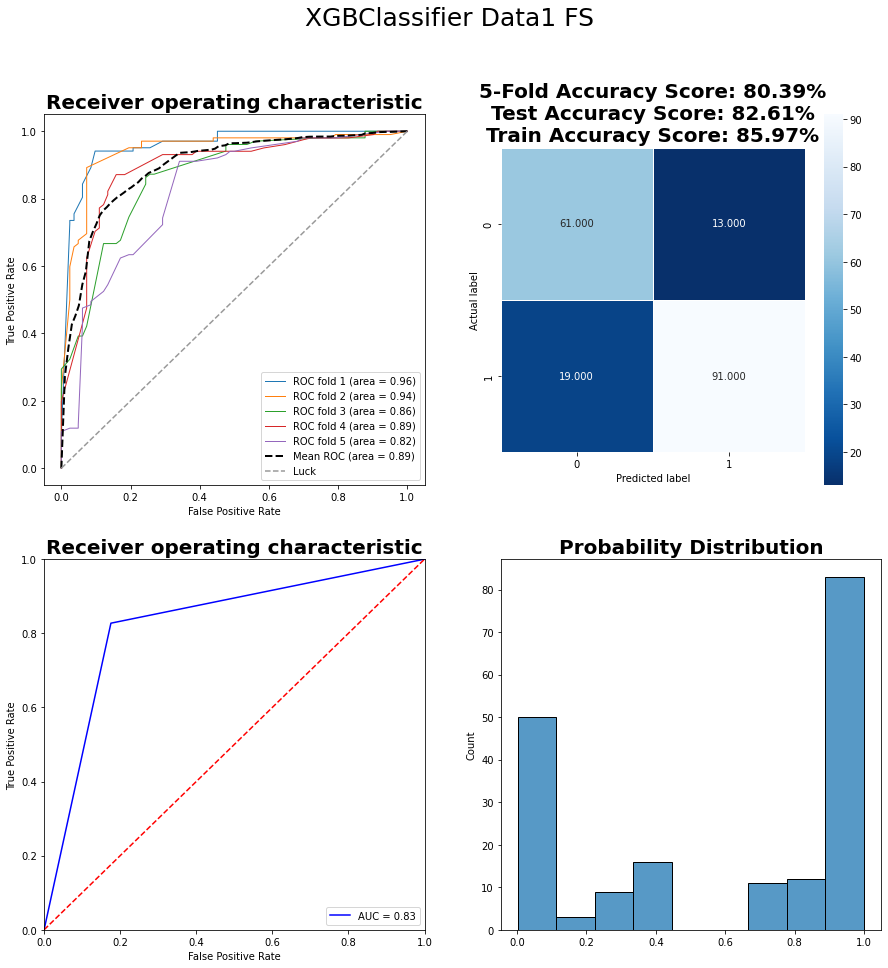

In [40]:
xgbc = XGBClassifier(objective='binary:logistic',n_jobs=-1,scale_pos_weight=scale_pos)
sfs = SequentialFeatureSelector(xgbc,n_jobs=-1,cv=cv,scoring='roc_auc')
sfs.fit(data1, y)
print(sfs.get_feature_names_out())
build_model(xgbc,sfs.transform(X1_train),y1_train,sfs.transform(X1_test),y1_test,
            pd.DataFrame(sfs.transform(data1)),y,label='Data1 FS')


## LightGBM
LightGBM is a new classifier that has not been introduced in class. It is a tree based algorithm that focuses on
efficiency and accuracy. It was one of the most efficient models with the shorted training time. LightGBM also scores
comparably to the other models and also appears to be balanced between both classes as shown in the confusion matrix
and probability distribution.

              precision    recall  f1-score   support

           0       0.81      0.81      0.81        74
           1       0.87      0.87      0.87       110

    accuracy                           0.85       184
   macro avg       0.84      0.84      0.84       184
weighted avg       0.85      0.85      0.85       184

Specificity = 0.8108108108108109
The balanced accuracy score is : 84.18%


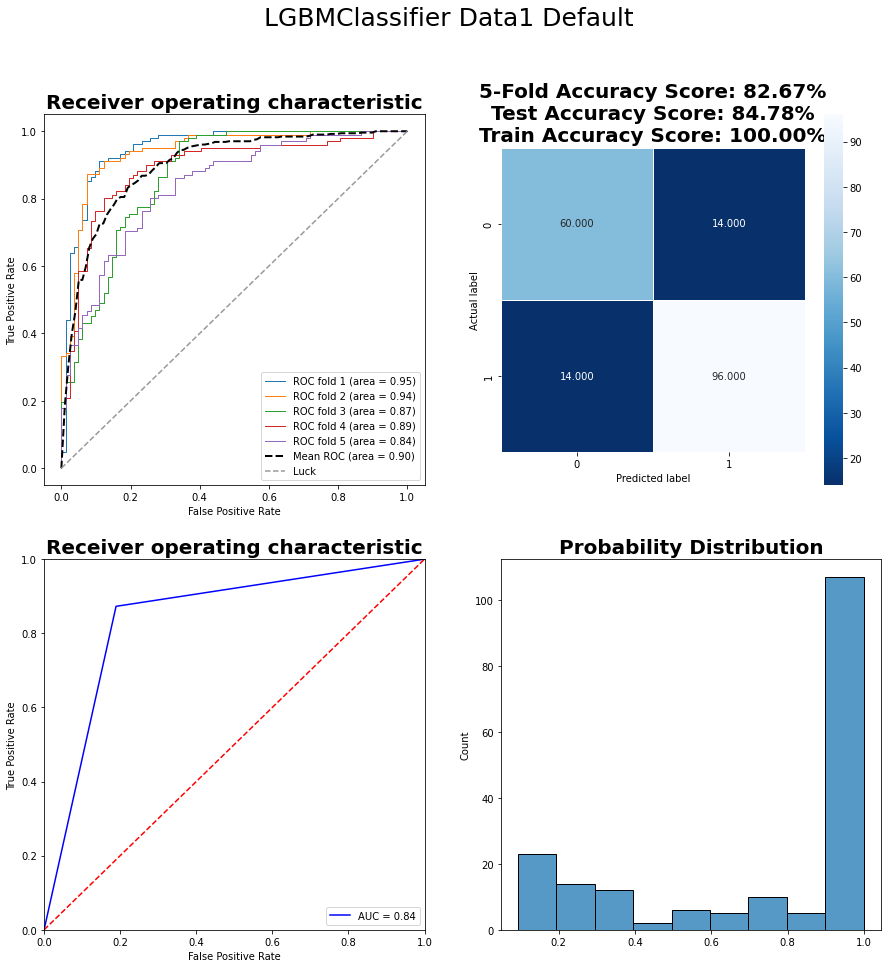

In [41]:
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(n_jobs=-1,random_state=32)
build_model(lgbm,X1_train,y1_train,X1_test,y1_test,data1,y,label='Data1 Default')

              precision    recall  f1-score   support

           0       0.78      0.82      0.80        74
           1       0.88      0.85      0.86       110

    accuracy                           0.84       184
   macro avg       0.83      0.83      0.83       184
weighted avg       0.84      0.84      0.84       184

Specificity = 0.8243243243243243
The balanced accuracy score is : 83.49%


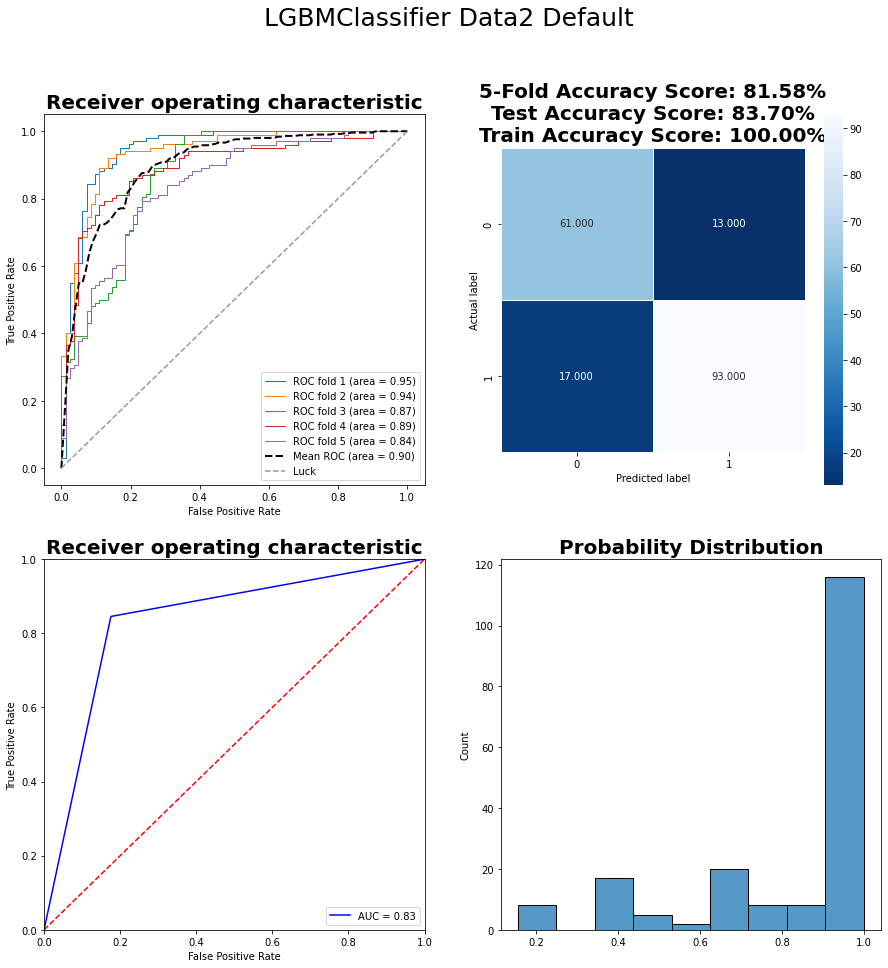

In [42]:
lgbm = LGBMClassifier(n_jobs=-1,random_state=32)
build_model(lgbm,X2_train,y2_train,X2_test,y2_test,data2,y,label='Data2 Default')

[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=1 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=10, reg_lambda=0.0 will be ignored. Current value: lambda_l2=10
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] lambda_l1 is set=0.001, reg_alpha=1 will be ignored. Current value: lambda_l1=0.001
[LightGBM] [Warning] lambda_l2 is set=10, reg_lambda=0.0 will be ignored. Current value: lambda_l2=10
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.001 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0.001, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.001
[LightGBM

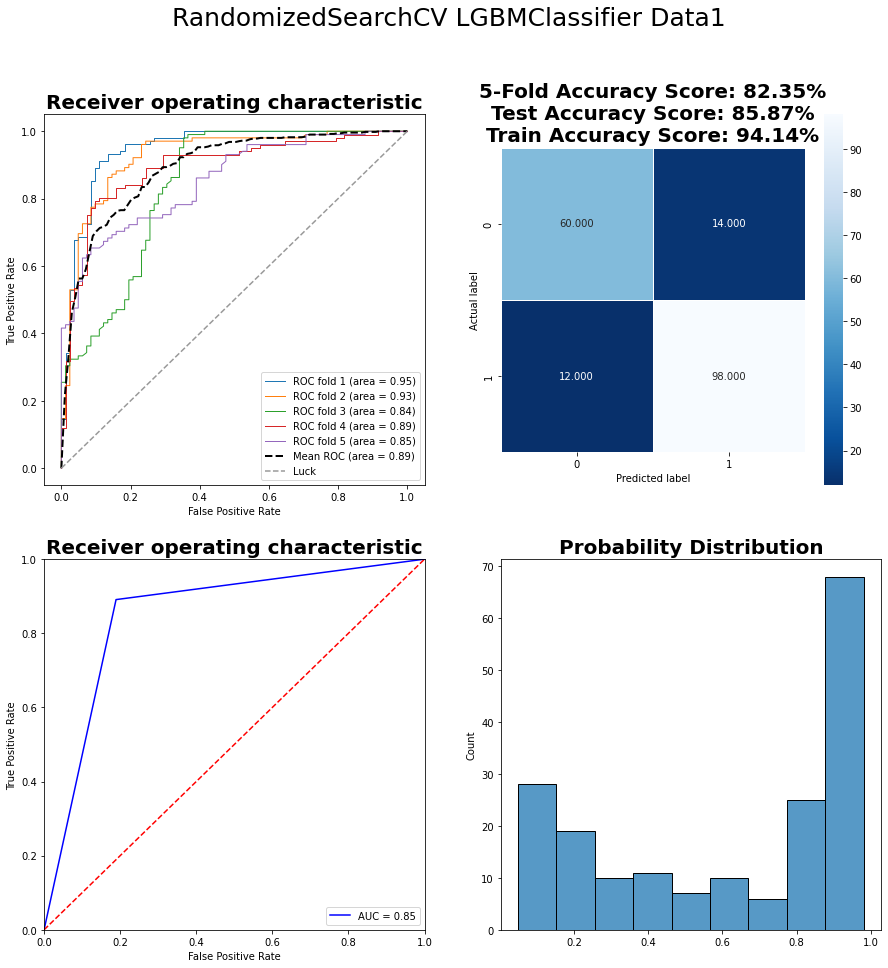

In [43]:
lgbm_grid = {
    'num_leaves': [3,10,100,1000],
    'reg_alpha': [0.001,.01,.1,1,10,100],
    'min_data_in_leaf': [1, 5, 10, 50, 100, 250],
    'lambda_l1': [0.001,.01,.1,1,10],
    'lambda_l2': [0.001,.01,.1,1,10]
    }

lgbm = LGBMClassifier(n_jobs=-1,random_state=32)
build_model(lgbm,X1_train,y1_train,X1_test,y1_test,data1,y,label='Data1',params=lgbm_grid)

[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] lambda_l1 is set=0.001, reg_alpha=100 will be ignored. Current value: lambda_l1=0.001
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] lambda_l1 is set=0.001, reg_alpha=1 will be ignored. Current value: lambda_l1=0.001
[LightGBM] [Warning] lambda_l2 is set=10, reg_lambda=0.0 will be ignored. Current value: lambda_l2=10
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] lambda_l1 is set=0.001, reg_alpha=100 will be ignored. Current value: lambda_l1=0.001
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[Li

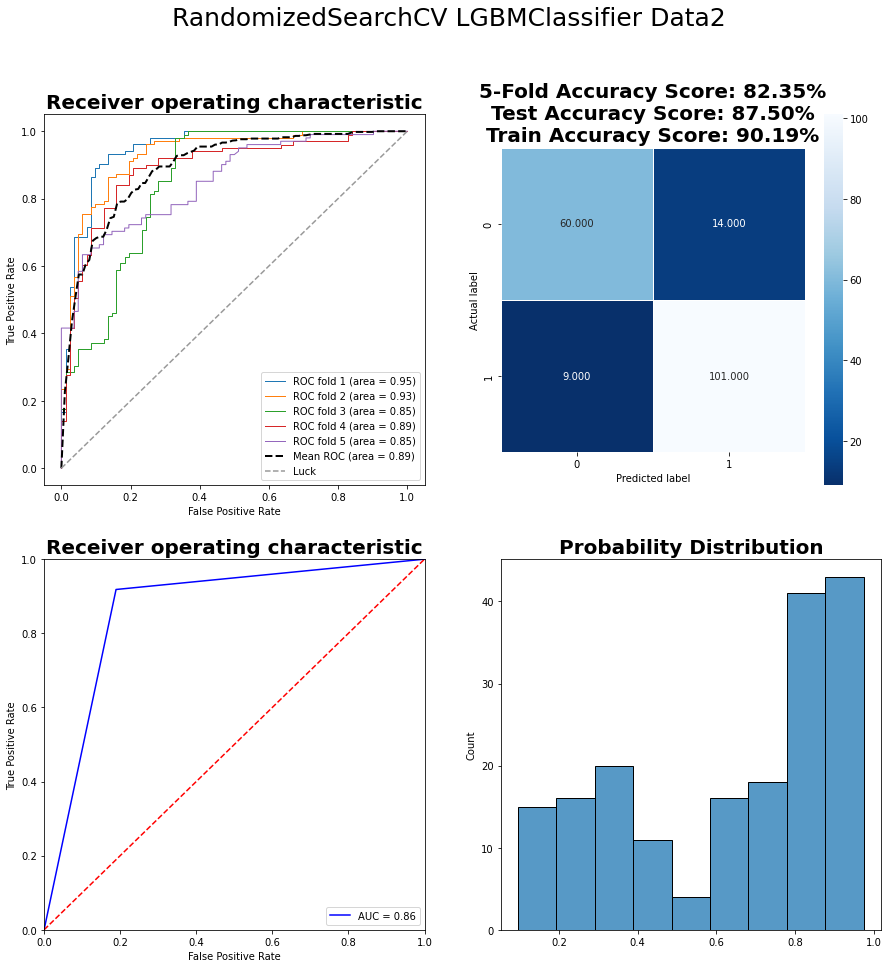

In [44]:
lgbm = LGBMClassifier(n_jobs=-1,random_state=32)
build_model(lgbm,X2_train,y2_train,X2_test,y2_test,data2,y,label='Data2',params=lgbm_grid)

### LightGBM Feature Selection - Sequential Feature Selection
Four of the features were selected that overlapped with the previous iterations of feature selection. This has been
confirmed by four other models that these are significant predictors.

['Sex' 'ChestPainType' 'FastingBS' 'Oldpeak' 'ST_Slope']


C:\Users\G_MAN\.conda\envs\pymc_env\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SequentialFeatureSelector was fitted with feature names
  warnings.warn(
C:\Users\G_MAN\.conda\envs\pymc_env\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SequentialFeatureSelector was fitted with feature names
  warnings.warn(


              precision    recall  f1-score   support

           0       0.77      0.82      0.80        74
           1       0.88      0.84      0.86       110

    accuracy                           0.83       184
   macro avg       0.82      0.83      0.83       184
weighted avg       0.83      0.83      0.83       184

Specificity = 0.8243243243243243
The balanced accuracy score is : 83.03%


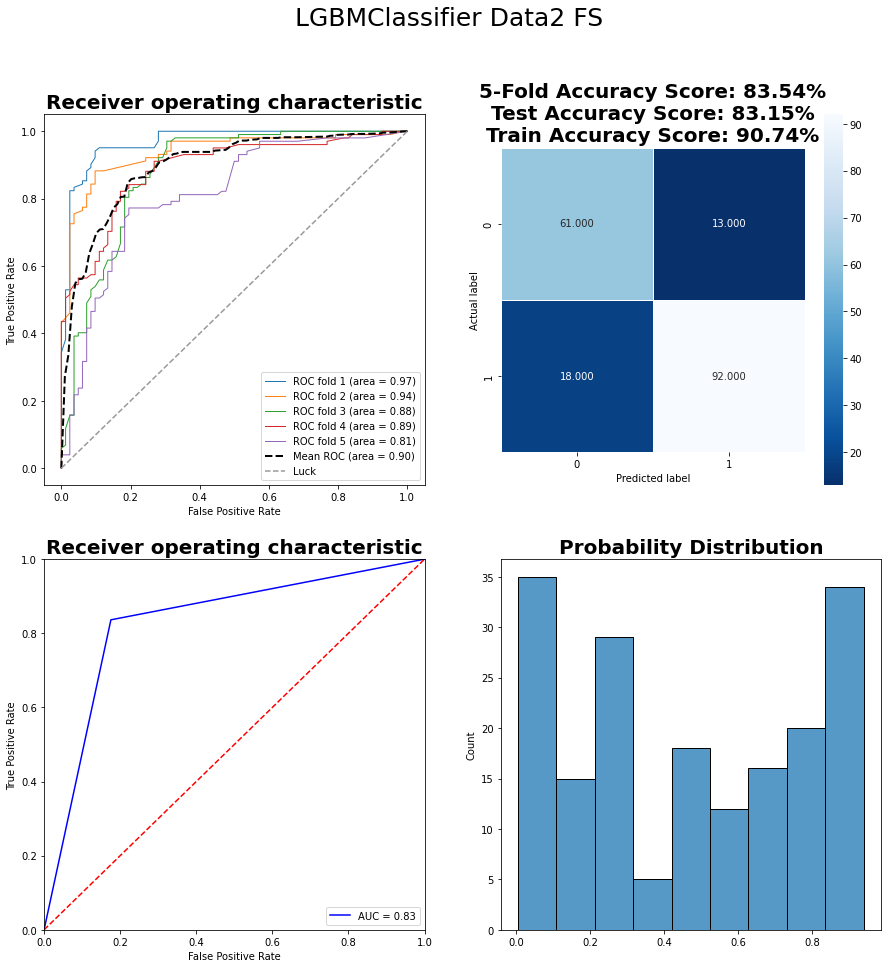

In [45]:
lgbm = LGBMClassifier(n_jobs=-1,random_state=32)
sfs = SequentialFeatureSelector(lgbm,n_jobs=-1,cv=cv,scoring='roc_auc')
sfs.fit(data2, y)
print(sfs.get_feature_names_out())
build_model(lgbm,sfs.transform(X2_train),y2_train,sfs.transform(X2_test),y2_test,
            pd.DataFrame(sfs.transform(data2)),y,label='Data2 FS')

['FastingBS' 'Oldpeak' 'Sex_F' 'Sex_M' 'ChestPainType_ASY'
 'ChestPainType_TA' 'RestingECG_ST' 'ExerciseAngina_N' 'ExerciseAngina_Y'
 'ST_Slope_Up']


C:\Users\G_MAN\.conda\envs\pymc_env\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SequentialFeatureSelector was fitted with feature names
  warnings.warn(
C:\Users\G_MAN\.conda\envs\pymc_env\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SequentialFeatureSelector was fitted with feature names
  warnings.warn(


              precision    recall  f1-score   support

           0       0.79      0.82      0.81        74
           1       0.88      0.85      0.87       110

    accuracy                           0.84       184
   macro avg       0.84      0.84      0.84       184
weighted avg       0.84      0.84      0.84       184

Specificity = 0.8243243243243243
The balanced accuracy score is : 83.94%


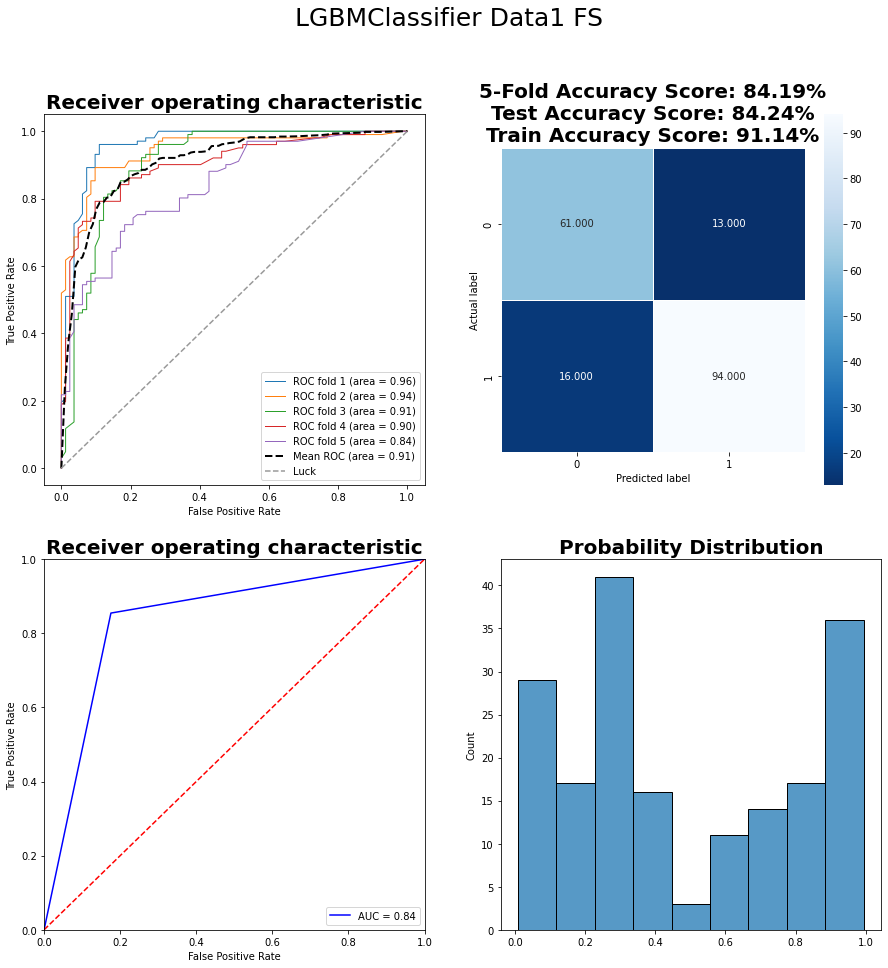

In [46]:
lgbm = LGBMClassifier(n_jobs=-1,random_state=32)
sfs = SequentialFeatureSelector(lgbm,n_jobs=-1,cv=cv,scoring='roc_auc')
sfs.fit(data1, y)
print(sfs.get_feature_names_out())
build_model(lgbm,sfs.transform(X1_train),y1_train,sfs.transform(X1_test),y1_test,
            pd.DataFrame(sfs.transform(data1)),y,label='Data1 FS')

## AdaBoost
AdaBoost classifier performed marginally worse than the other models. It achieved a much lower accuracy and AUC score.
The probability distribution appears to be balanced but many of the predictions are along the threshold.
It apperars to have high variance between models as shown in the 5-fold CV ROC plot.

C:\Users\G_MAN\.conda\envs\pymc_env\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


              precision    recall  f1-score   support

           0       0.76      0.84      0.79        74
           1       0.88      0.82      0.85       110

    accuracy                           0.83       184
   macro avg       0.82      0.83      0.82       184
weighted avg       0.83      0.83      0.83       184

Specificity = 0.8378378378378378
The balanced accuracy score is : 82.80%


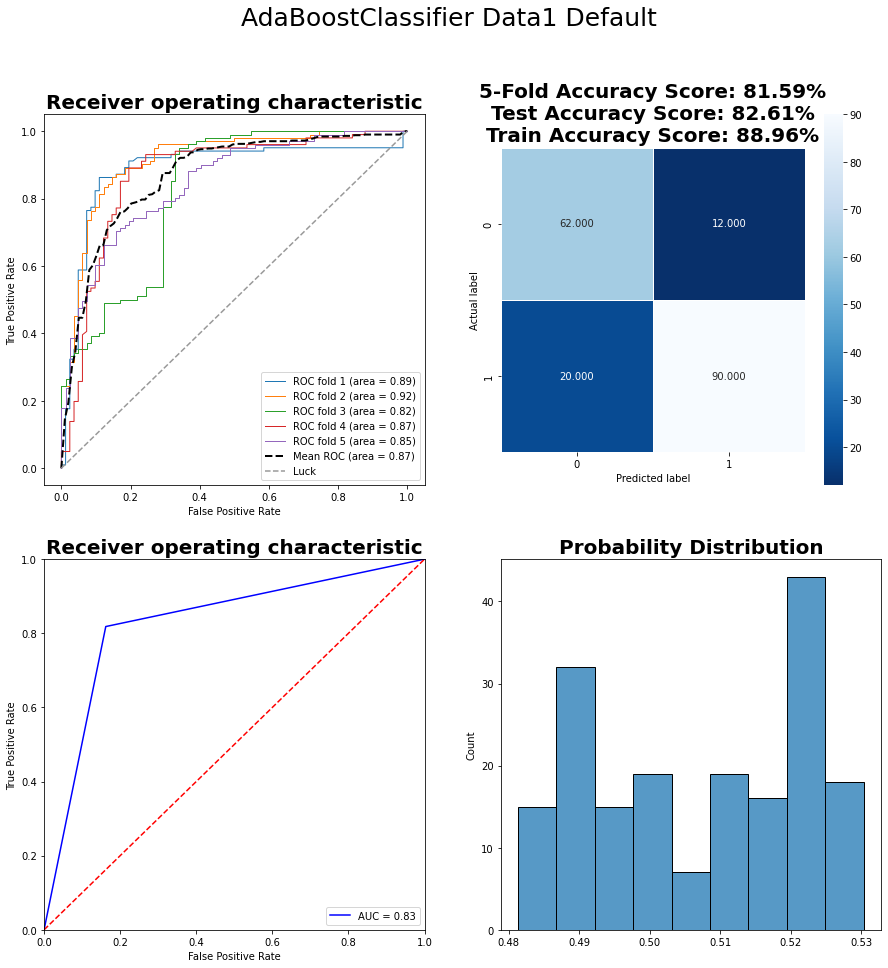

In [47]:
from sklearn.ensemble import AdaBoostClassifier

abc = AdaBoostClassifier(random_state=32)
build_model(abc,X1_train,y1_train,X1_test,y1_test,data1,y,label='Data1 Default')

C:\Users\G_MAN\.conda\envs\pymc_env\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


              precision    recall  f1-score   support

           0       0.77      0.84      0.80        74
           1       0.88      0.83      0.85       110

    accuracy                           0.83       184
   macro avg       0.82      0.83      0.83       184
weighted avg       0.84      0.83      0.83       184

Specificity = 0.8378378378378378
The balanced accuracy score is : 83.26%


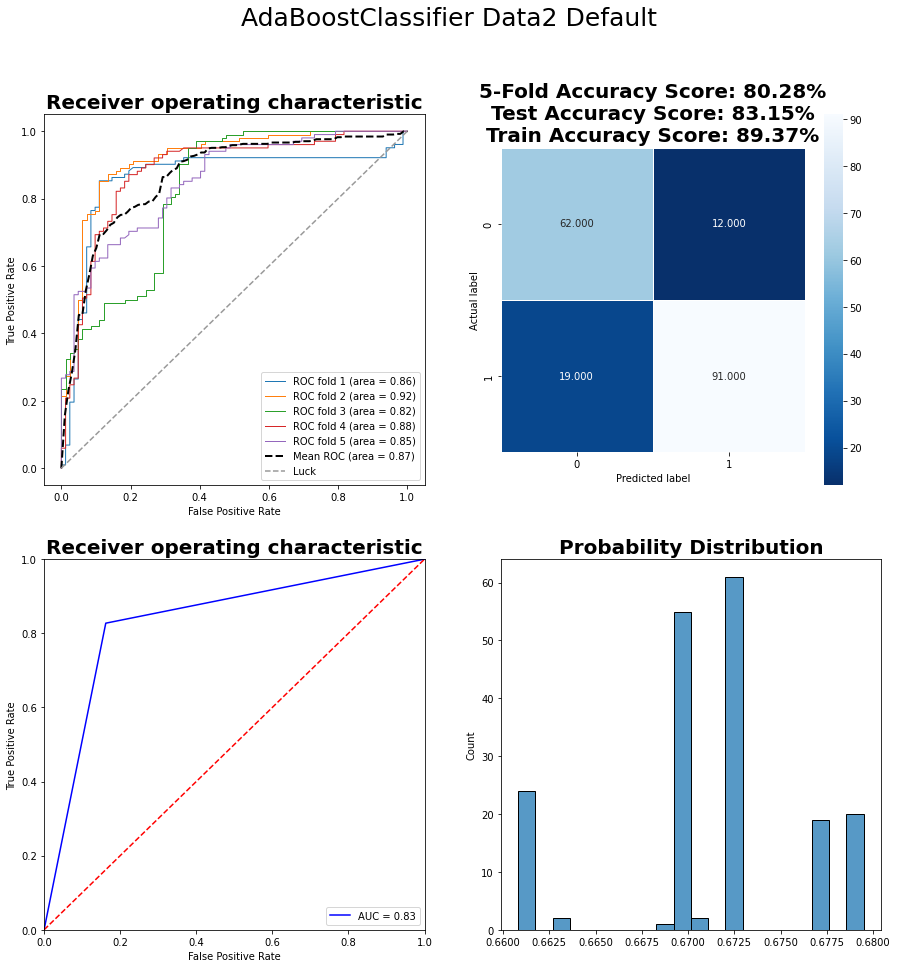

In [48]:
abc = AdaBoostClassifier(random_state=32)
build_model(abc,X2_train,y2_train,X2_test,y2_test,data2,y,label='Data2 Default')

C:\Users\G_MAN\.conda\envs\pymc_env\lib\site-packages\sklearn\model_selection\_search.py:292: UserWarning: The total space of parameters 20 is smaller than n_iter=100. Running 20 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\G_MAN\.conda\envs\pymc_env\lib\site-packages\sklearn\model_selection\_search.py:292: UserWarning: The total space of parameters 20 is smaller than n_iter=100. Running 20 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\G_MAN\.conda\envs\pymc_env\lib\site-packages\sklearn\model_selection\_search.py:292: UserWarning: The total space of parameters 20 is smaller than n_iter=100. Running 20 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\G_MAN\.conda\envs\pymc_env\lib\site-packages\sklearn\model_selection\_search.py:292: UserWarning: The total space of parameters 20 is smaller than n_iter=100. Running 20 iterations. For exhaustive searches, use GridSearchCV.
  warnings.wa

              precision    recall  f1-score   support

           0       0.82      0.85      0.83        74
           1       0.90      0.87      0.88       110

    accuracy                           0.86       184
   macro avg       0.86      0.86      0.86       184
weighted avg       0.87      0.86      0.86       184

Specificity = 0.8513513513513513
The balanced accuracy score is : 86.20%


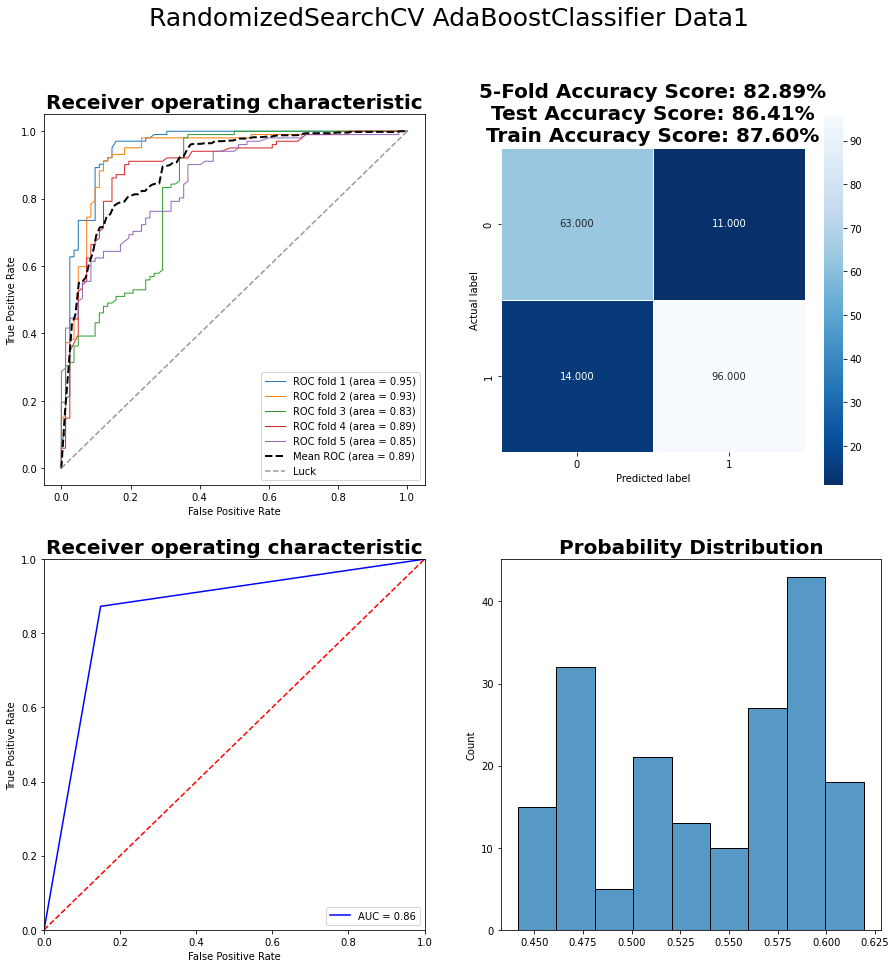

In [49]:
abc_params = {
    'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1.0],
    'n_estimators':[10, 50, 100, 500],
}
abc = AdaBoostClassifier(random_state=32)
build_model(abc,X1_train,y1_train,X1_test,y1_test,data1,y,label='Data1',params=abc_params)

C:\Users\G_MAN\.conda\envs\pymc_env\lib\site-packages\sklearn\model_selection\_search.py:292: UserWarning: The total space of parameters 20 is smaller than n_iter=100. Running 20 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\G_MAN\.conda\envs\pymc_env\lib\site-packages\sklearn\model_selection\_search.py:292: UserWarning: The total space of parameters 20 is smaller than n_iter=100. Running 20 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\G_MAN\.conda\envs\pymc_env\lib\site-packages\sklearn\model_selection\_search.py:292: UserWarning: The total space of parameters 20 is smaller than n_iter=100. Running 20 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\G_MAN\.conda\envs\pymc_env\lib\site-packages\sklearn\model_selection\_search.py:292: UserWarning: The total space of parameters 20 is smaller than n_iter=100. Running 20 iterations. For exhaustive searches, use GridSearchCV.
  warnings.wa

              precision    recall  f1-score   support

           0       0.82      0.85      0.83        74
           1       0.90      0.87      0.88       110

    accuracy                           0.86       184
   macro avg       0.86      0.86      0.86       184
weighted avg       0.87      0.86      0.86       184

Specificity = 0.8513513513513513
The balanced accuracy score is : 86.20%


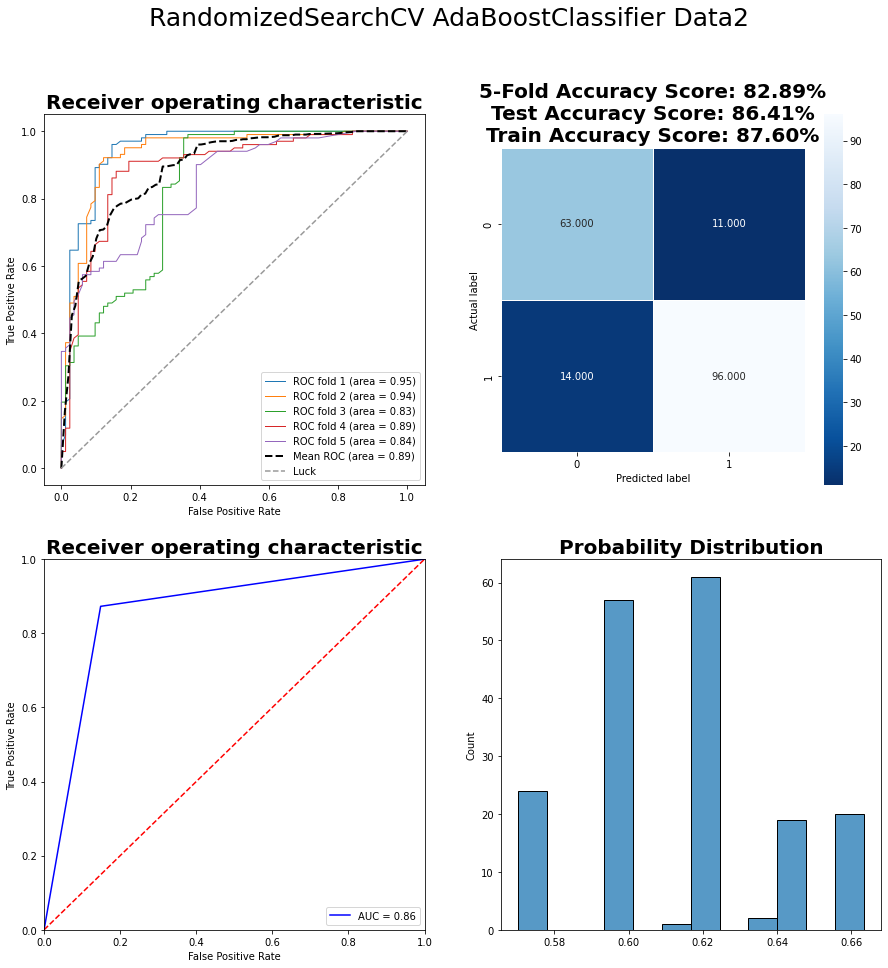

In [50]:
abc = AdaBoostClassifier(random_state=32)
build_model(abc,X2_train,y2_train,X2_test,y2_test,data2,y,label='Data2',params=abc_params)

### AdaBoost Feature Selection - Sequential Feature Selection
The same 3-5 features are selected once again.  However, the predictions achieved are much more varied.

['Sex' 'ChestPainType' 'FastingBS' 'ExerciseAngina' 'ST_Slope']


C:\Users\G_MAN\.conda\envs\pymc_env\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SequentialFeatureSelector was fitted with feature names
  warnings.warn(
C:\Users\G_MAN\.conda\envs\pymc_env\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SequentialFeatureSelector was fitted with feature names
  warnings.warn(


              precision    recall  f1-score   support

           0       0.78      0.82      0.80        74
           1       0.88      0.85      0.86       110

    accuracy                           0.84       184
   macro avg       0.83      0.83      0.83       184
weighted avg       0.84      0.84      0.84       184

Specificity = 0.8243243243243243
The balanced accuracy score is : 83.49%


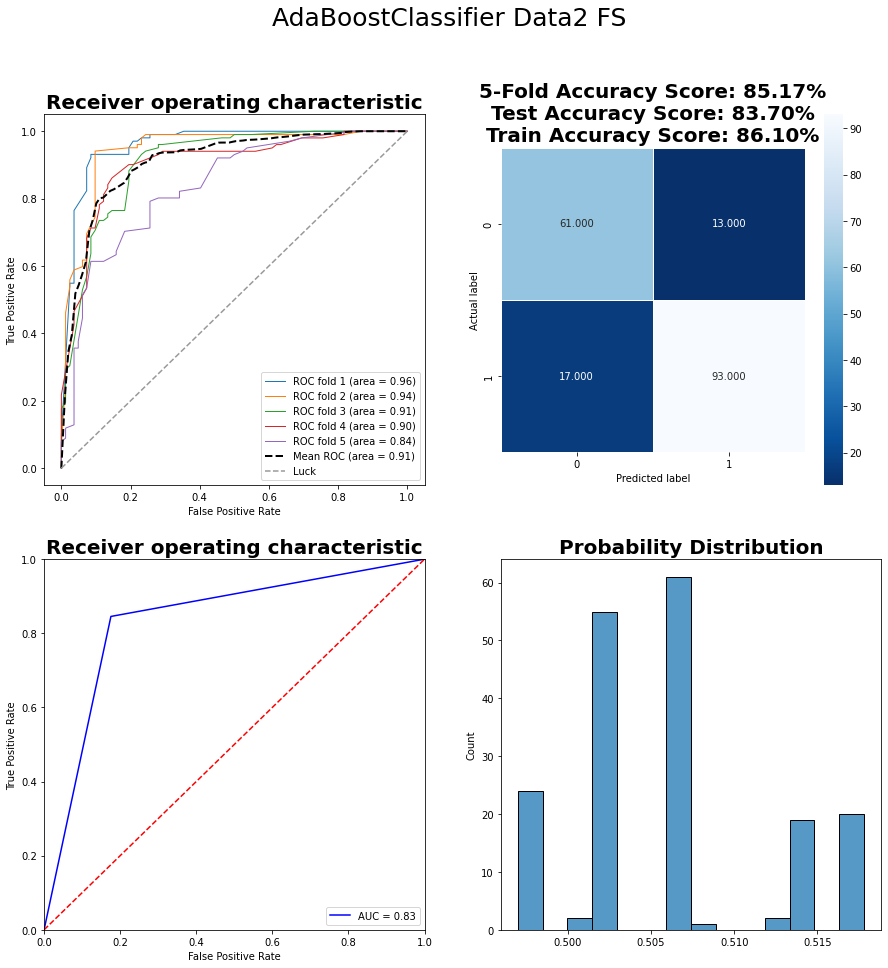

In [51]:
abc = AdaBoostClassifier(random_state=32)
sfs = SequentialFeatureSelector(abc,n_jobs=-1,cv=cv,scoring='roc_auc')
sfs.fit(data2, y)
print(sfs.get_feature_names_out())
build_model(abc,sfs.transform(X2_train),y2_train,sfs.transform(X2_test),y2_test,
            pd.DataFrame(sfs.transform(data2)),y,label='Data2 FS')

['FastingBS' 'Sex_F' 'Sex_M' 'ChestPainType_ASY' 'ChestPainType_TA'
 'RestingECG_LVH' 'RestingECG_Normal' 'ExerciseAngina_N'
 'ExerciseAngina_Y' 'ST_Slope_Up']


C:\Users\G_MAN\.conda\envs\pymc_env\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SequentialFeatureSelector was fitted with feature names
  warnings.warn(
C:\Users\G_MAN\.conda\envs\pymc_env\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SequentialFeatureSelector was fitted with feature names
  warnings.warn(


              precision    recall  f1-score   support

           0       0.78      0.82      0.80        74
           1       0.88      0.85      0.86       110

    accuracy                           0.84       184
   macro avg       0.83      0.83      0.83       184
weighted avg       0.84      0.84      0.84       184

Specificity = 0.8243243243243243
The balanced accuracy score is : 83.49%


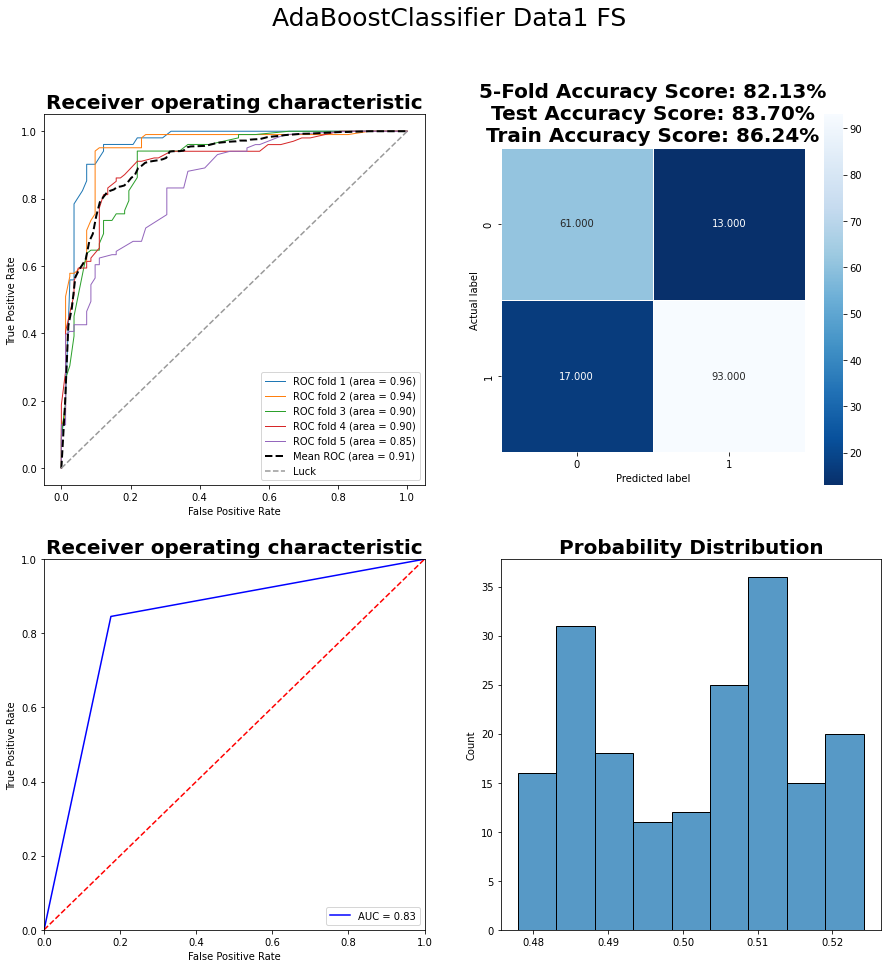

In [52]:
abc = AdaBoostClassifier(random_state=32)
sfs = SequentialFeatureSelector(abc,n_jobs=-1,cv=cv,scoring='roc_auc')
sfs.fit(data1, y)
print(sfs.get_feature_names_out())
build_model(abc,sfs.transform(X1_train),y1_train,sfs.transform(X1_test),y1_test,
            pd.DataFrame(sfs.transform(data1)),y,label='Data1 FS')


## CatBoost
Catboost has been one of the marginally better models compared to the rest of the other ones. The probability
distribution is still skewed and tend to favor heart disease class.

              precision    recall  f1-score   support

           0       0.85      0.82      0.84        74
           1       0.88      0.90      0.89       110

    accuracy                           0.87       184
   macro avg       0.87      0.86      0.86       184
weighted avg       0.87      0.87      0.87       184

Specificity = 0.8243243243243243
The balanced accuracy score is : 86.22%


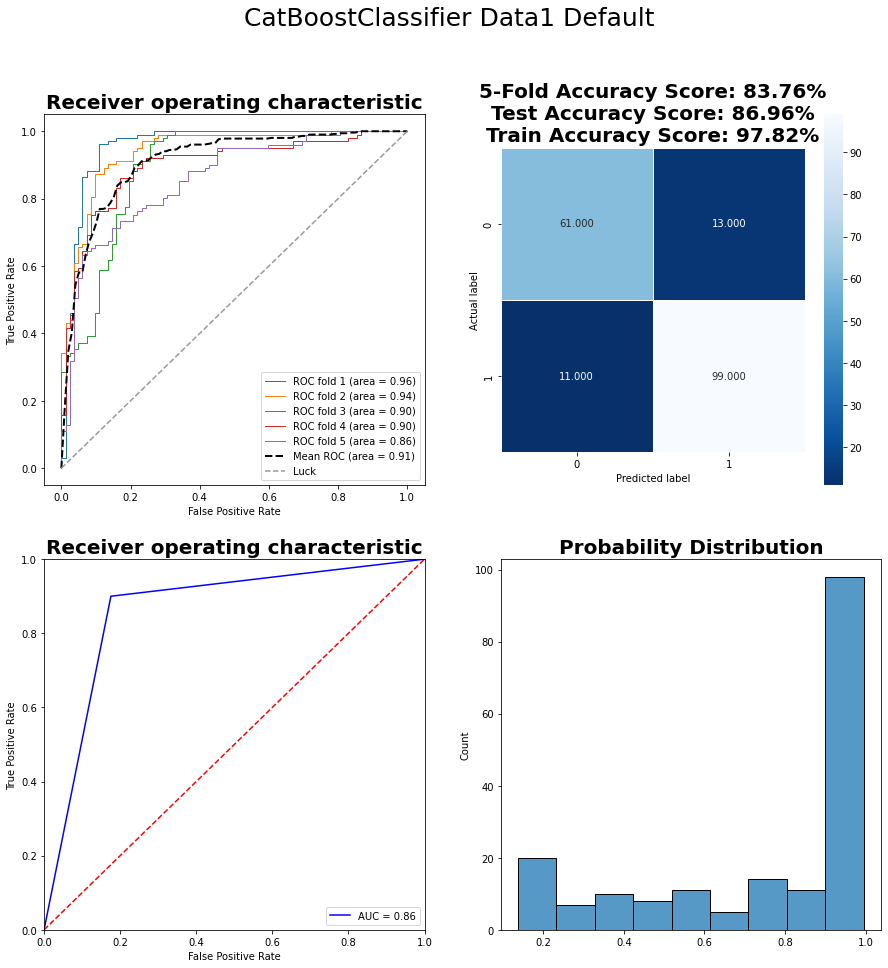

In [53]:
from catboost import CatBoostClassifier

cbc = CatBoostClassifier(random_state=32,verbose=False)
build_model(cbc,X1_train,y1_train,X1_test,y1_test,data1,y,label='Data1 Default')


              precision    recall  f1-score   support

           0       0.82      0.82      0.82        74
           1       0.88      0.88      0.88       110

    accuracy                           0.86       184
   macro avg       0.85      0.85      0.85       184
weighted avg       0.86      0.86      0.86       184

Specificity = 0.8243243243243243
The balanced accuracy score is : 85.31%


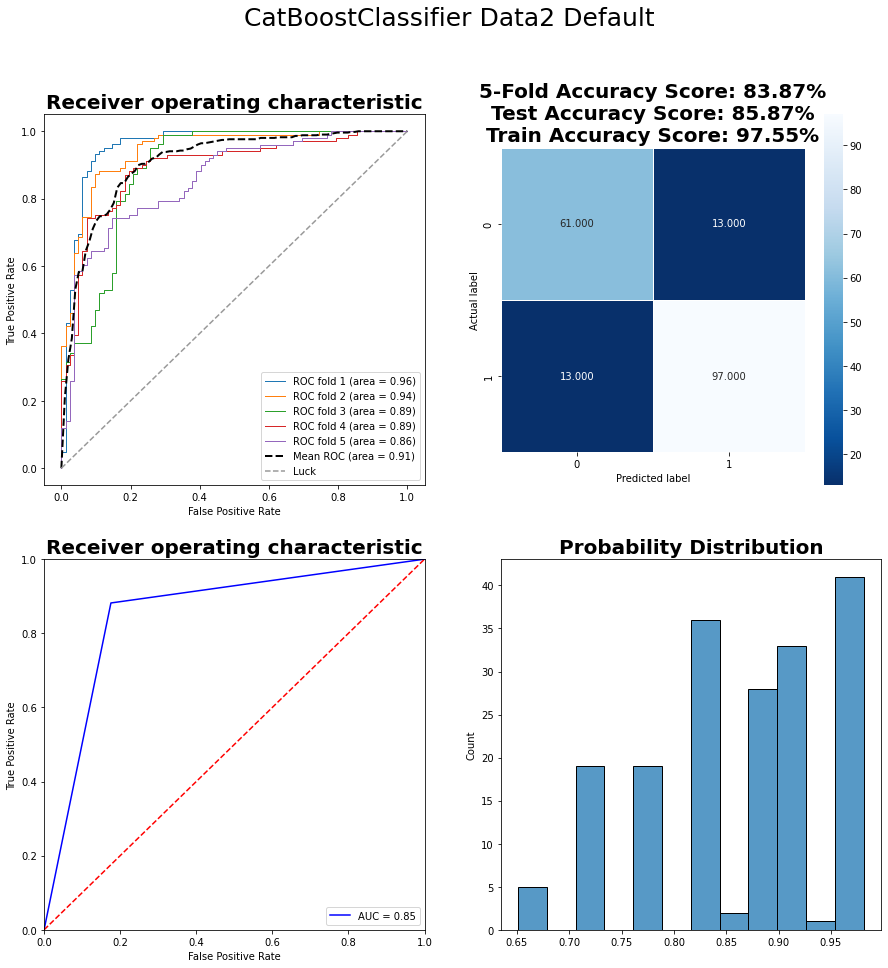

In [54]:
cbc = CatBoostClassifier(random_state=32,verbose=False)
build_model(cbc,X2_train,y2_train,X2_test,y2_test,data2,y,label='Data2 Default')

C:\Users\G_MAN\.conda\envs\pymc_env\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
80 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
80 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\G_MAN\.conda\envs\pymc_env\lib\site-packages\sklearn\model_selection\_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\G_MAN\.conda\envs\pymc_env\lib\site-packages\catboost\core.py", line 4716, in fit
    self._fit(X, y, cat_features, text_features, embedding_features, None, sample_weight, None, None, None, None, baseline, use_best_model,
  File "C:\Users\G_MAN\.conda\envs\pymc_env\lib\

C:\Users\G_MAN\.conda\envs\pymc_env\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
80 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
80 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\G_MAN\.conda\envs\pymc_env\lib\site-packages\sklearn\model_selection\_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\G_MAN\.conda\envs\pymc_env\lib\site-packages\catboost\core.py", line 4716, in fit
    self._fit(X, y, cat_features, text_features, embedding_features, None, sample_weight, None, None, None, None, baseline, use_best_model,
  File "C:\Users\G_MAN\.conda\envs\pymc_env\lib\

              precision    recall  f1-score   support

           0       0.85      0.82      0.84        74
           1       0.88      0.90      0.89       110

    accuracy                           0.87       184
   macro avg       0.87      0.86      0.86       184
weighted avg       0.87      0.87      0.87       184

Specificity = 0.8243243243243243
The balanced accuracy score is : 86.22%


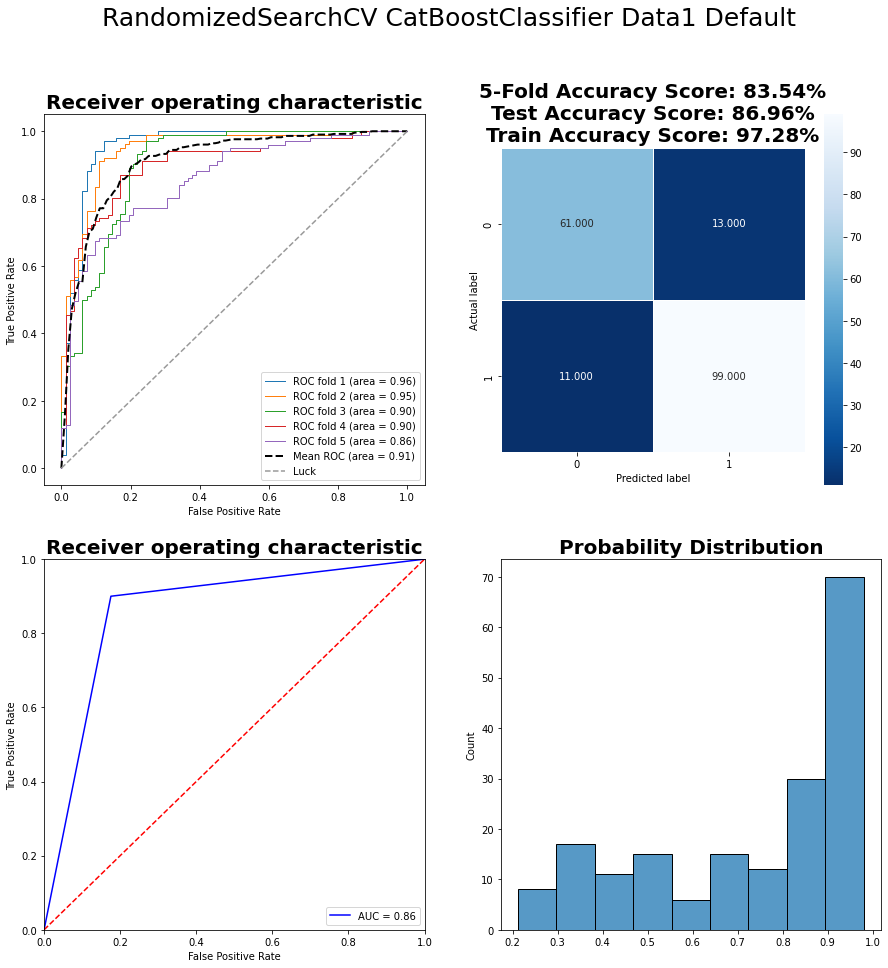

In [55]:
cbc_params =    {
    'learning_rate': [0.01,0.02,0.03,0.04],
    'depth': [4, 6,7,8,9,10,15,20],
    'l2_leaf_reg': [0,0.5,1, 3],
    'iterations': [10, 20,30,40,50,60,70,80,90, 100,150]
}
cbc = CatBoostClassifier(random_state=32,verbose=False)
build_model(cbc,X1_train,y1_train,X1_test,y1_test,data1,y,label='Data1 Default',params=cbc_params)

C:\Users\G_MAN\.conda\envs\pymc_env\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
80 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
80 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\G_MAN\.conda\envs\pymc_env\lib\site-packages\sklearn\model_selection\_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\G_MAN\.conda\envs\pymc_env\lib\site-packages\catboost\core.py", line 4716, in fit
    self._fit(X, y, cat_features, text_features, embedding_features, None, sample_weight, None, None, None, None, baseline, use_best_model,
  File "C:\Users\G_MAN\.conda\envs\pymc_env\lib\

C:\Users\G_MAN\.conda\envs\pymc_env\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
80 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
80 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\G_MAN\.conda\envs\pymc_env\lib\site-packages\sklearn\model_selection\_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\G_MAN\.conda\envs\pymc_env\lib\site-packages\catboost\core.py", line 4716, in fit
    self._fit(X, y, cat_features, text_features, embedding_features, None, sample_weight, None, None, None, None, baseline, use_best_model,
  File "C:\Users\G_MAN\.conda\envs\pymc_env\lib\

              precision    recall  f1-score   support

           0       0.85      0.85      0.85        74
           1       0.90      0.90      0.90       110

    accuracy                           0.88       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.88      0.88      0.88       184

Specificity = 0.8513513513513513
The balanced accuracy score is : 87.57%


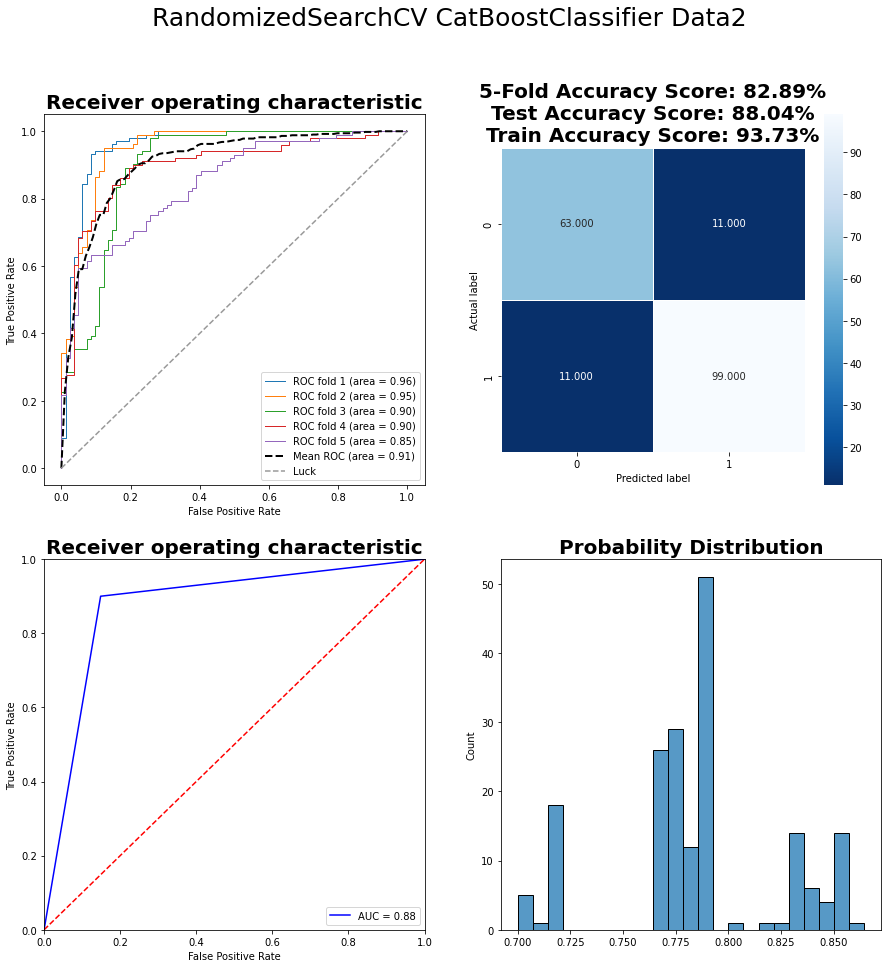

In [56]:
cbc = CatBoostClassifier(random_state=32,verbose=False)
build_model(cbc,X2_train,y2_train,X2_test,y2_test,data2,y,label='Data2',params=cbc_params)

### CatBoost Feature Selection - Sequential Feature Selection
The same 3-5 features are selected once again.  However, the predictions achieved are much more varied.

['Sex' 'ChestPainType' 'FastingBS' 'Oldpeak' 'ST_Slope']


C:\Users\G_MAN\.conda\envs\pymc_env\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SequentialFeatureSelector was fitted with feature names
  warnings.warn(
C:\Users\G_MAN\.conda\envs\pymc_env\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SequentialFeatureSelector was fitted with feature names
  warnings.warn(


              precision    recall  f1-score   support

           0       0.80      0.85      0.82        74
           1       0.90      0.85      0.87       110

    accuracy                           0.85       184
   macro avg       0.85      0.85      0.85       184
weighted avg       0.86      0.85      0.85       184

Specificity = 0.8513513513513513
The balanced accuracy score is : 85.29%


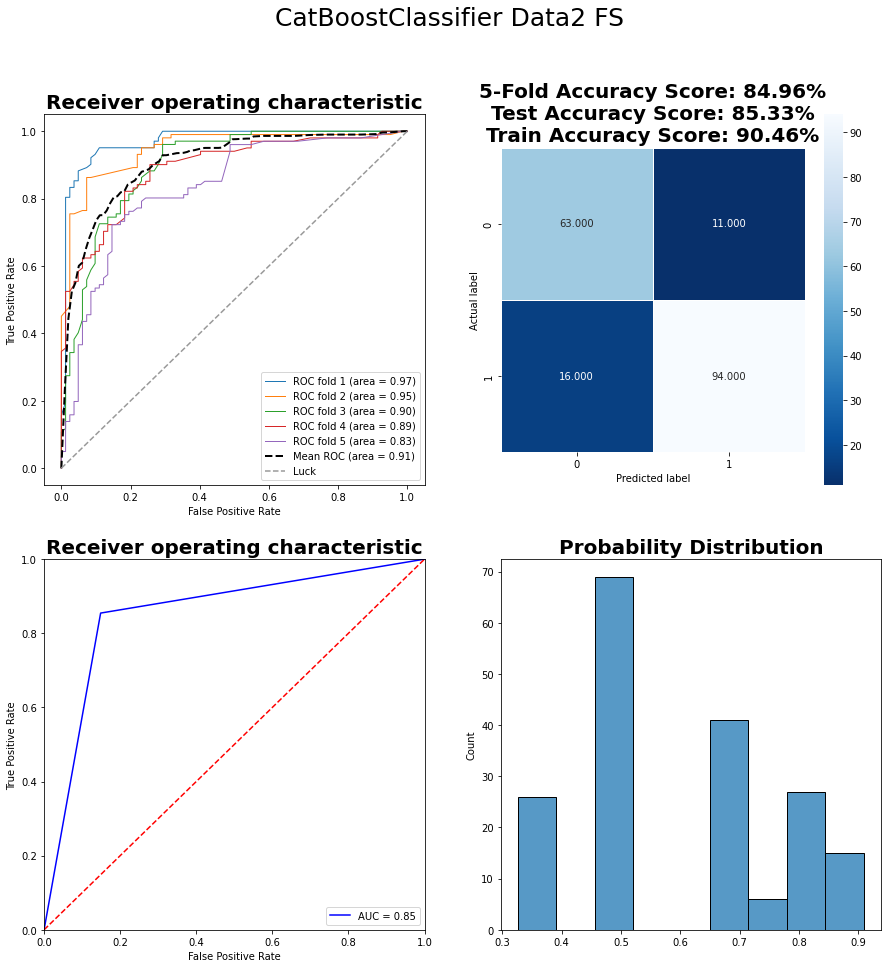

In [57]:
cbc = CatBoostClassifier(random_state=32,verbose=False)
sfs = SequentialFeatureSelector(cbc,n_jobs=-1,cv=cv,scoring='roc_auc')
sfs.fit(data2, y)
print(sfs.get_feature_names_out())
build_model(cbc,sfs.transform(X2_train),y2_train,sfs.transform(X2_test),y2_test,
            pd.DataFrame(sfs.transform(data2)),y,label='Data2 FS')

['RestingBP' 'FastingBS' 'MaxHR' 'Oldpeak' 'Sex_F' 'Sex_M'
 'ChestPainType_ASY' 'ExerciseAngina_N' 'ST_Slope_Down' 'ST_Slope_Up']


C:\Users\G_MAN\.conda\envs\pymc_env\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SequentialFeatureSelector was fitted with feature names
  warnings.warn(
C:\Users\G_MAN\.conda\envs\pymc_env\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SequentialFeatureSelector was fitted with feature names
  warnings.warn(


              precision    recall  f1-score   support

           0       0.81      0.81      0.81        74
           1       0.87      0.87      0.87       110

    accuracy                           0.85       184
   macro avg       0.84      0.84      0.84       184
weighted avg       0.85      0.85      0.85       184

Specificity = 0.8108108108108109
The balanced accuracy score is : 84.18%


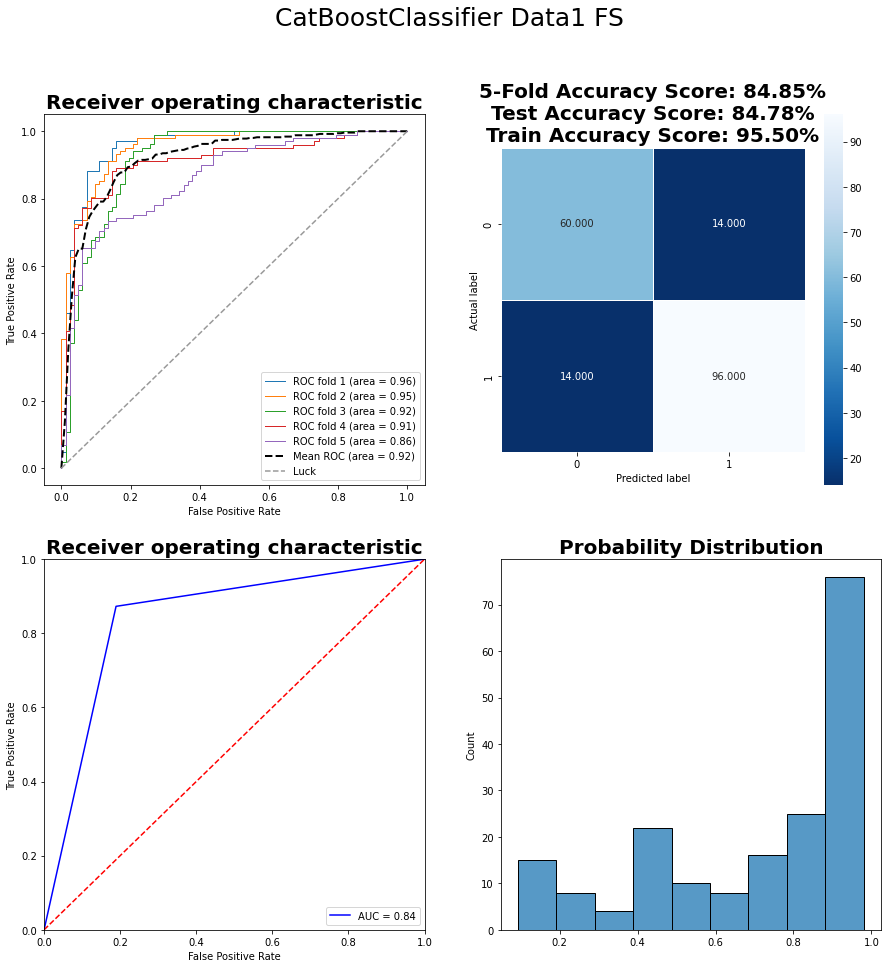

In [58]:
cbc = CatBoostClassifier(random_state=32,verbose=False)
sfs = SequentialFeatureSelector(cbc,n_jobs=-1,cv=cv,scoring='roc_auc')
sfs.fit(data1, y)
print(sfs.get_feature_names_out())
build_model(cbc,sfs.transform(X1_train),y1_train,sfs.transform(X1_test),y1_test,
            pd.DataFrame(sfs.transform(data1)),y,label='Data1 FS')



# Summary of Results
A total of 42 different models were built around predicting heart disease in a patient. With a total of 11 unique
features that were composed of both categorical and continuous values. Two different data set samples were experimented
with, one using one-hot encoding for the categorical features and the other using Weight of Evidence transformation.
Each of the data samples were trained in three ways. First, by training the model using the default values. Second, by
performing a randomized search for hyper-parameters tuning; and lastly by performing feature selection.

## What are your findings?
All the models attained a test accuracy score between 82% - 86% and AUC values between 0.82 - 0.86. Shown below are the
summarized table of results for all the models trained. Data1 represents the data sample using one-hot encoding
transformation while Data2 represents the data sample using Weight of Evidence transformation. The 42 models were
trained between 7 different classifiers. Unfortunately there is not one model that truly outperforms the others as all
models achieved very similar scores with marginal improvements between each other. What stands out the most is how
balanced the models are in predicting either class. Nearly all cases were biased towards patients with heart disease.
Meaning, the model would most likely classify as having heart disease. This is due to the unbalanced nature of the data
where the split was around 55%/44% having and not having heart disease. Two of the most generalizable models were the
random forest classifier and XGBoost classifier. Those two models had the most balanced probability distributions and
had balanced metrics between classes. They did not have the highest accuracy or AUC such as Catboost, but they had the
most balanced performance metrics as shown by the F-1 scores, confusion matrices and probability distributions. The
highest performance model is the Catboost model trained on Data2, Weight of Evidence tranformation. However, as stated
before, it is biased towards heart disease. Since the results are only a marginal improvement over all the other models,
the final model would have to be either random forest or XGBoost due to their generalizability and efficiency. Additionally, experimenting between one-hot encoding and weight of evidence had marginally similar results where the dataset trained by the data sample transformed by weight of evidence performed better than one-hot encoding. In other words, transforming the categorical variables into weight of evidence enabled a marginally better more parsimonious model. Lastly,
another interesting finding between the models was the constant overlap between selected features during feature
selection. In nearly every case 3-5 features were consistently selected as important features using sequential feature
selection. It appears that sex, chest pain type, fasting blood sugar, old peak, and st slope, are important predictive
features in determining heart disease.

## If you had more time what do you think can be done further to improve the results?
If given more time, I would perform SMOTE, or over/under sampling of the data in order to achieve a more generalized
model. As stated before, the dataset was unbalanced with a 55%/44% split between having and not having heart disease.
Although it is not the most unbalanced set, SMOTE, and over/under sampling well help artificially create a balanced 
dataset which will ultimately train a more generalizable model. 

## Default Models
Model | Dataset | Train Accuracy | Test Accuracy | 5-Fold Test Accuracy | AUC | 5-Fold AUC
-----|-----|-----|-----|-----|-----|-----|
Logistic Regression | Data1 | 86.51% | 84.78% | 82.89% | 0.84 | 0.91
Logistic Regression | Data2 | 87.47% | 85.33% | 82.35% | 0.85 | 0.91
Random Forest | Data1 | 100% | 86.96% | 83.00% | 0.86 | 0.91
Random Forest | Data2 | 100% | 85.33% | 83.69% | 0.85 | 0.90
Support Vector Mch | Data1 | 87.47% | 85.33% | 83.00% | 0.85 | 0.91
Support Vector Mch | Data2 | 87.06% | 85.33% | 82.02% | 0.85 | 0.90
XGBoost | Data1 | 100% | 84.24% | 81.36% | 0.84 | 0.90
XGBoost | Data2 | 100% | 82.61% | 82.02% | 0.82 | 0.90
LightGBM | Data1 | 100% | 84.78% | 82.67% | 0.84 | 0.90
LightGBM | Data2 | 100% | 83.70% | 81.58% | 0.83 | 0.90
AdaBoost | Data1 | 88.96% | 82.61% | 81.59% | 0.83 | 0.87
AdaBoost | Data2 | 89.37% | 83.15% | 80.28% | 0.83 | 0.87
CatBoost | Data1 | 97.82% | 86.96% | 83.76% | 0.86 | 0.91
CatBoost | Data2 | 97.55% | 85.87% | 83.87% | 0.85 | 0.91

## Randomized Search Models
Model | Dataset | Train Accuracy | Test Accuracy | 5-Fold Test Accuracy | AUC | 5-Fold AUC
-----|-----|-----|-----|-----|-----|-----|
Logistic Regression RS | Data1 | 86.38% | 86.96% | 82.35% | 0.86 | 0.91
Logistic Regression RS | Data2 | 86.24% | 85.33% | 81.37% | 0.85 | 0.90
Random Forest RS | Data1 | 92.10% | 88.59% | 83.98% | 0.88 | 0.91
Random Forest RS | Data2 | 93.73% | 86.41% | 82.78% | 0.86 | 0.91
Support Vector Mch RS | Data1 | 87.47% | 85.33% | 83.44% | 0.85 | 0.90
Support Vector Mch RS | Data2 | 87.06% | 85.33% | 81.47% | 0.85 | 0.90
XGBoost RS | Data1 | 92.51% | 86.96% | 83.11% | 0.86 | 0.89
XGBoost RS | Data2 | 91.96% | 88.04% | 83.43% | 0.87 | 0.89
LightGBM RS | Data1 | 94.14% | 85.87% | 82.35% | 0.85 | 0.89
LightGBM RS | Data2 | 90.19% | 87.50% | 82.35% | 0.86 | 0.89
AdaBoost RS | Data1 | 87.60% | 86.41% | 82.89% | 0.86 | 0.89
AdaBoost RS | Data2 | 87.60% | 86.41% | 82.89% | 0.86 | 0.89
CatBoost RS | Data1 | 97.28% | 86.96% | 83.54% | 0.86 | 0.91
CatBoost RS | Data2 | 93.73% | 88.04% | 82.89% | 0.88 | 0.91

## Feature Selected Models
Model | Dataset | Train Accuracy | Test Accuracy | 5-Fold Test Accuracy | AUC | 5-Fold AUC
-----|-----|-----|-----|-----|-----|-----|
Logistic Regression FS | Data1 | 86.65% | 84.24% | 84.41% | 0.84 | 0.92
Logistic Regression FS | Data2 | 85.97% | 84.24% | 83.98% | 0.84 | 0.91
Random Forest FS | Data1 | 91.69% | 83.70% | 83.65% | 0.84 | 0.89
Random Forest FS | Data2 | 86.51% | 82.61% | 83.65% | 0.83 | 0.89
Support Vector Mch FS | Data1 | 85.69% | 83.15% | 84.20% | 0.83 | 0.92
Support Vector Mch FS | Data2 | 81.47% | 80.98% | 79.07% | 0.80 | 0.90
XGBoost FS | Data1 | 86.51% | 82.07% | 80.93% | 0.82 | 0.89
XGBoost FS | Data2 | 91.28% | 82.61% | 82.99% | 0.82 | 0.89
LightGBM FS | Data1 | 91.14% | 84.24% | 84.19% | 0.84 | 0.91
LightGBM FS | Data2 | 90.74% | 83.15% | 83.54% | 0.83 | 0.90
AdaBoost FS | Data1 | 86.24% | 83.70% | 82.13% | 0.83 | 0.91
AdaBoost FS | Data2 | 86.10% | 83.70% | 85.17% | 0.83 | 0.91
CatBoost FS | Data1 | 95.50% | 84.78% | 84.85% | 0.84 | 0.92
CatBoost FS | Data2 | 90.46% | 85.33% | 84.96% | 0.85 | 0.91


